In [1]:
import os
from functools import reduce
from cdo import Cdo
cdo = Cdo()
import multiprocessing

In [2]:
def get_directory_structure(rootdir):
    """
    Creates a nested dictionary that represents the folder structure of rootdir
    """
    dir_dict = {}
    rootdir = rootdir.rstrip(os.sep)
    start = rootdir.rfind(os.sep) + 1
    for path, dirs, files in os.walk(rootdir):
        folders = path[start:].split(os.sep)
        subdir = dict.fromkeys(files)
        parent = reduce(dict.get, folders[:-1], dir_dict)
        parent[folders[-1]] = subdir
    return dir_dict

In [3]:
def check_tsteps(files, path):
    files_checkt = []
    for file in files:
        if int(cdo.ndate(input=f"{path}/{file}")[0]) > 10000:
            files_checkt.append(file)
            
    return files_checkt
            
            

In [91]:
def EnsMean(files, path, folders):
    gridfile = "/home/abhi/Documents/mygit/CORDEX_EnsMean/data/gridfile.txt"
    outfile_name = "_".join(folders)
    
    files = check_tsteps(files, path)
    if "HIST" in folders:
        cmd = " ".join(list(map(lambda file: f"-remapbil,{gridfile} -daymean"+\
                                   f" -vertmean -selyear,1971/2000 {path}/{file}", files)))
        
    else:
        tslice_string = "/".join(folders[-1].split("-"))
        cmd = " ".join(list(map(lambda file: f"-remapbil,{gridfile} -daymean"+\
                           f" -vertmean -selyear,{tslice_string} {path}/{file}", files)))
        
    outfile = f"/home/abhi/Documents/mygit/CORDEX_EnsMean/output/{outfile_name}.nc"
    
    return cdo.ensmean(input=cmd, output=outfile)

In [39]:
"/".join(folders[-1].split("-"))

'2061/2090'

In [117]:
%%time
EnsMean(*[file_list, path,"_".join(folders)])

CPU times: user 468 ms, sys: 260 ms, total: 728 ms
Wall time: 1min 30s


'/home/abhi/Documents/mygit/CORDEX_EnsMean/output/TEMP_RCP45_MAX_2061-2090.nc'

In [54]:
lst.remove('tasmin_WAS-44_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc')

In [85]:
new_lst = check_tsteps(lst, "/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MIN/2061-2090/")

In [89]:
path = "/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MIN/2061-2090/"
for file in new_lst:
    print(cdo.ndate(input=f"{path}/{file}"))

['10740']
['10740']
['10740']
['10740']
['8952']
['10740']
['10748']


In [92]:
%%time
EnsMean(*[lst, "/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MIN/2061-2090/",
          ["TEMP", "RCP45", "MIN", "2061-2090"]])

CPU times: user 84 ms, sys: 724 ms, total: 808 ms
Wall time: 28.8 s


'/home/abhi/Documents/mygit/CORDEX_EnsMean/output/TEMP_RCP45_MIN_2061-2090.nc'

In [ ]:
%%time
EnsMean(*[])

In [100]:
%%time
rootdir = "/home/abhi/Documents/data/CORDEX/TEMP"
dir_dict = {}
rootdir = rootdir.rstrip(os.sep)
start = rootdir.rfind(os.sep) + 1

# pool = multiprocessing.Pool(10)

for path, dirs, files in os.walk(rootdir):
    
    oldpwd = os.getcwd()

    folders = path[start:].split(os.sep)
    subdir = dict.fromkeys(files)
    parent = reduce(dict.get, folders[:-1], dir_dict)
    if subdir == {}:
        parent[folders[-1]] = subdir
    else:
        file_list = list(filter(lambda x: x.endswith(".nc"), files))
        parent[folders[-1]] = dict()
        parent[folders[-1]]["files"] = file_list
        parent[folders[-1]]["EnsMean"] = EnsMean(file_list, path, folders)
        
# pool.close()
# pool.join()

KeyboardInterrupt: 

In [98]:
file_list

['tasmax_WAS-44_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44i_ACCESS1-0_rcp45_r1_CSIRO-CCAM_2061_2090.nc',
 'tasmax_WAS-44i_NorESM1-M_rcp45_r1_CSIRO-CCAM_2061_2090.nc',
 'tasmax_WAS-44_NOAA-GFDL-GFDL-ESM2M_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44i_MPI-ESM-LR_rcp45_r1_CSIRO-CCAM_2061_2090.nc',
 'tasmax_WAS-44_IPSL-IPSL-CM5A-MR_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44_ICHEC-EC-EARTH_rcp45_r12i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44i_CCSM4_rcp45_r1_CSIRO-CCAM_2061_2090.nc',
 'tasmax_WAS-44_MIROC-MIROC5_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc',
 'tasmax_WAS-44i_CNRM-CM5_rcp45_r1_CSIRO-CCAM_2061_2090.nc',
 'tasmax_WAS-44_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_MPI-CSC-REMO2009_2061-2090.nc']

### iris regrid 

In [43]:
ds = xr.open_dataset("/home/abhi/Documents/mygit/CORDEX_EnsMean/output/TEMP_RCP45_MEAN_2021-2050.nc")

In [44]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 129, lon: 135, time: 10741)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2051-01-01T12:00:00
  * lon        (lon) float64 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:                            Climate Data Interface version 1.9.4 (htt...
    Conventions:                    CF-1.4
    history:                        Wed Dec 12 13:09:07 2018: cdo -O ensmean ...
    institution:                    Swedish Meteorological and Hydrological I...
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2015-04-18-T18:11:04Z
    experiment:                     RCP4.5
    experiment_id:                  rcp45
    driving_experiment:             IPSL

### Mean change in temp

In [21]:
os.chdir("output/")

In [24]:
files = os.listdir()

In [25]:
ndates = dict()
for file in files:
    ndates[file] = int(cdo.ndate(input=file)[0])

In [26]:
ndates

{'TEMP_RCP45_MEAN_2061-2090.nc': 10740,
 'TEMP_RCP85_MIN_2021-2050.nc': 10740,
 'TEMP_HIST_MAX.nc': 10740,
 'TEMP_RCP85_MEAN_2021-2050.nc': 10740,
 'TEMP_RCP45_MAX_2021-2050.nc': 10740,
 'TEMP_RCP85_MAX_2061-2090.nc': 10740,
 'TEMP_RCP45_MAX_2061-2090.nc': 10740,
 'TEMP_RCP45_MIN_2021-2050.nc': 10740,
 'TEMP_HIST_MIN.nc': 10740,
 'TEMP_HIST_MEAN.nc': 10740,
 'TEMP_RCP85_MEAN_2061-2090.nc': 10740,
 'TEMP_RCP45_MEAN_2021-2050.nc': 10740,
 'TEMP_RCP85_MIN_2061-2090.nc': 10740,
 'TEMP_RCP85_MAX_2021-2050.nc': 10740,
 'TEMP_RCP45_MIN_2061-2090.nc': 10740}

In [27]:
hist_merged = cdo.merge(input=" ".join([f"TEMP_HIST_{var}.nc" 
                                        for var in ["MEAN", "MAX", "MIN"]]),
                       env={"SKIP_SAME_TIME": "1"},
                       returnCDF=True)

In [28]:
merged = dict()

In [29]:
merged["HIST"] = hist_merged

In [30]:
%%time
for scen in ["RCP45", "RCP85"]:
    merged[scen] = dict()
    for tslice in ["2021-2050", "2061-2090"]:
        merged[scen][tslice] = cdo.merge(input=" ".join([f"TEMP_{scen}_{var}_{tslice}.nc" 
                                                for var in ["MEAN", "MAX", "MIN"]]),
                                         env={"SKIP_SAME_TIME": "1"},
                                         returnCDF=True)

CPU times: user 24 ms, sys: 12 ms, total: 36 ms
Wall time: 3min 6s


In [31]:
! ncview {merged["RCP45"]["2021-2050"]}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for tas...
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 1082 requests (1082 known processed) with 0 events remaining.


### Mean change in temperature

In [39]:
%%time

change = deepcopy(merged)
del change["HIST"]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 64.1 µs


In [53]:
%%time
for scen in ["RCP45", "RCP85"]:
    for tslice in ["2021-2050", "2061-2090"]:
#         change[scen][tslice] = dict()
        i = 0
        for seas in ["Annual"]:#, "JJAS", "ON", "DJF", "MAM"]:
            
            if seas == "Annual":
                FILE_NAME_FUT = merged[scen][tslice]
                FILE_NAME_BASE = merged["HIST"]
            else:
                FILE_NAME_FUT = f"-selseas,{seas} {merged[scen][tslice]}"
                FILE_NAME_BASE = f"-selseas,{seas} {merged['HIST']}"
                
            
            change[scen][tslice][seas] = cdo.timmean(input=f"-sub {FILE_NAME_FUT} {FILE_NAME_BASE}",
                                                        returnCDF=True)

            i += 1

CPU times: user 16 ms, sys: 8 ms, total: 24 ms
Wall time: 1min


In [160]:
xr.open_dataset(change["RCP45"]["2021-2050"]["Annual"])

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 129, lon: 135, time: 1)
Coordinates:
  * time       (time) object 2036-01-01 00:00:00
  * lon        (lon) float64 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    tasmax     (time, lat, lon) float32 ...
    tasmin     (time, lat, lon) float32 ...
Attributes:
    CDI:                            Climate Data Interface version 1.9.4 (htt...
    Conventions:                    CF-1.4
    history:                        Wed Dec 12 18:52:24 2018: cdo -O timmean ...
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2015-04-18-T18:11:04Z
    experiment:                     RCP4.5
    experiment_id:                  rcp45
    driving_experiment:             IPSL-IPSL-CM5A-MR, rcp45, r1i1p1


In [42]:
import geopandas as gpd

In [43]:
shp = gpd.read_file("/home/abhi/Documents/data/shapefiles/India_climatic_correct/India_climatic_correct.shp")
telangana = gpd.read_file("/home/abhi/Documents/data/shapefiles/telangana/telangana.shp")

In [44]:
varname = {"mean": "tas",
               "max": "tasmax",
               "min": "tasmin"}

In [45]:
var = "max"
region = "Telangana"

def change_temp(var, region, savefig=False):
    fig, axn = plt.subplots(4, 5, sharex=True, sharey=True, dpi=400)

    axn_flat = axn.flatten()

    plot_order = [('2021-2050', 'rcp45'),
                  ('2021-2050', 'rcp85'),
                  ('2061-2090', 'rcp45'),
                  ('2061-2090', 'rcp85')]


    for seas in [ 'Annual', 'JJAS', 'ON', 'DJF', 'MAM']:

        if seas is 'Annual':
            axn_pos = [0, 5, 10, 15]
        elif seas is 'JJAS':
            axn_pos = [1, 6, 11, 16]
        elif seas is 'ON':
            axn_pos = [2, 7, 12, 17]
        elif seas is 'DJF':
            axn_pos = [3, 8, 13, 18]
        elif seas is 'MAM':
            axn_pos = [4, 9, 14, 19]


        i = 0
        for pos in axn_pos:

            ax = axn_flat[pos]

            tslice = plot_order[i][0]
            scen = plot_order[i][1]

            ds = (xr.open_dataset(change[scen.upper()][tslice][seas])
                  .mean(['bnds', 'time'])
                  .drop('time_bnds'))

            plot = (ds[varname[var]]
                     .plot.contourf(ax=ax,
                                    levels=[0, 1, 1.5, 2, 3, 5, 7],
                                   cmap='YlOrRd',extend='max'))

            caption = "Fig. Seasonal change in $T_{}$ for two scenarios (RCP4.5 and RCP8.5)".format("{"+var+"}")+\
                      "for the near future (2021-2050) and long term future (2061-2090).\n"




            if region == "Telangana":
                telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                ax.set_ylim(15.5, 20)
                ax.set_xlim(76.5, 82)
                caption += "The figure is centered over the telanagana region."
                save_name = f"CORDEX_change_T{var}_telangana.png"

            else:
                shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                ax.set_xticks(range(60, 110, 10))
                ax.set_yticks(range(10, 50, 10))
                save_name = f"CORDEX_change_T{var}.png"

            plot.colorbar.remove()

            ax.set_xlabel('')
            ax.set_ylabel('')

            ax.set_xticklabels([''])
            ax.set_yticklabels([''])





            if pos <= 4:
                ax.set_title(seas, fontweight='bold')

            if seas is 'Annual':
                ax.set_ylabel(scen.upper(), fontweight='bold', size=5)

            i += 1



    fig.text(0.05, 0.8, "2021-2050", rotation=90, fontweight='bold')
    fig.text(0.05, 0.4, "2061-2090", rotation=90, fontweight='bold')


    fig.text(0.5, 0.05,
             caption,
             size=6, ha='center', va='center')


    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])

    fig.colorbar(plot, cax=cbar_ax, extend='both')

    cbar_ax.set_ylabel("$^\circ$C", fontweight="bold")

    fig.subplots_adjust(wspace=0)
    if savefig:
        fig.savefig(f"../plots/{save_name}", dpi=400)
        plt.close(fig)


KeyError: 'Annual'

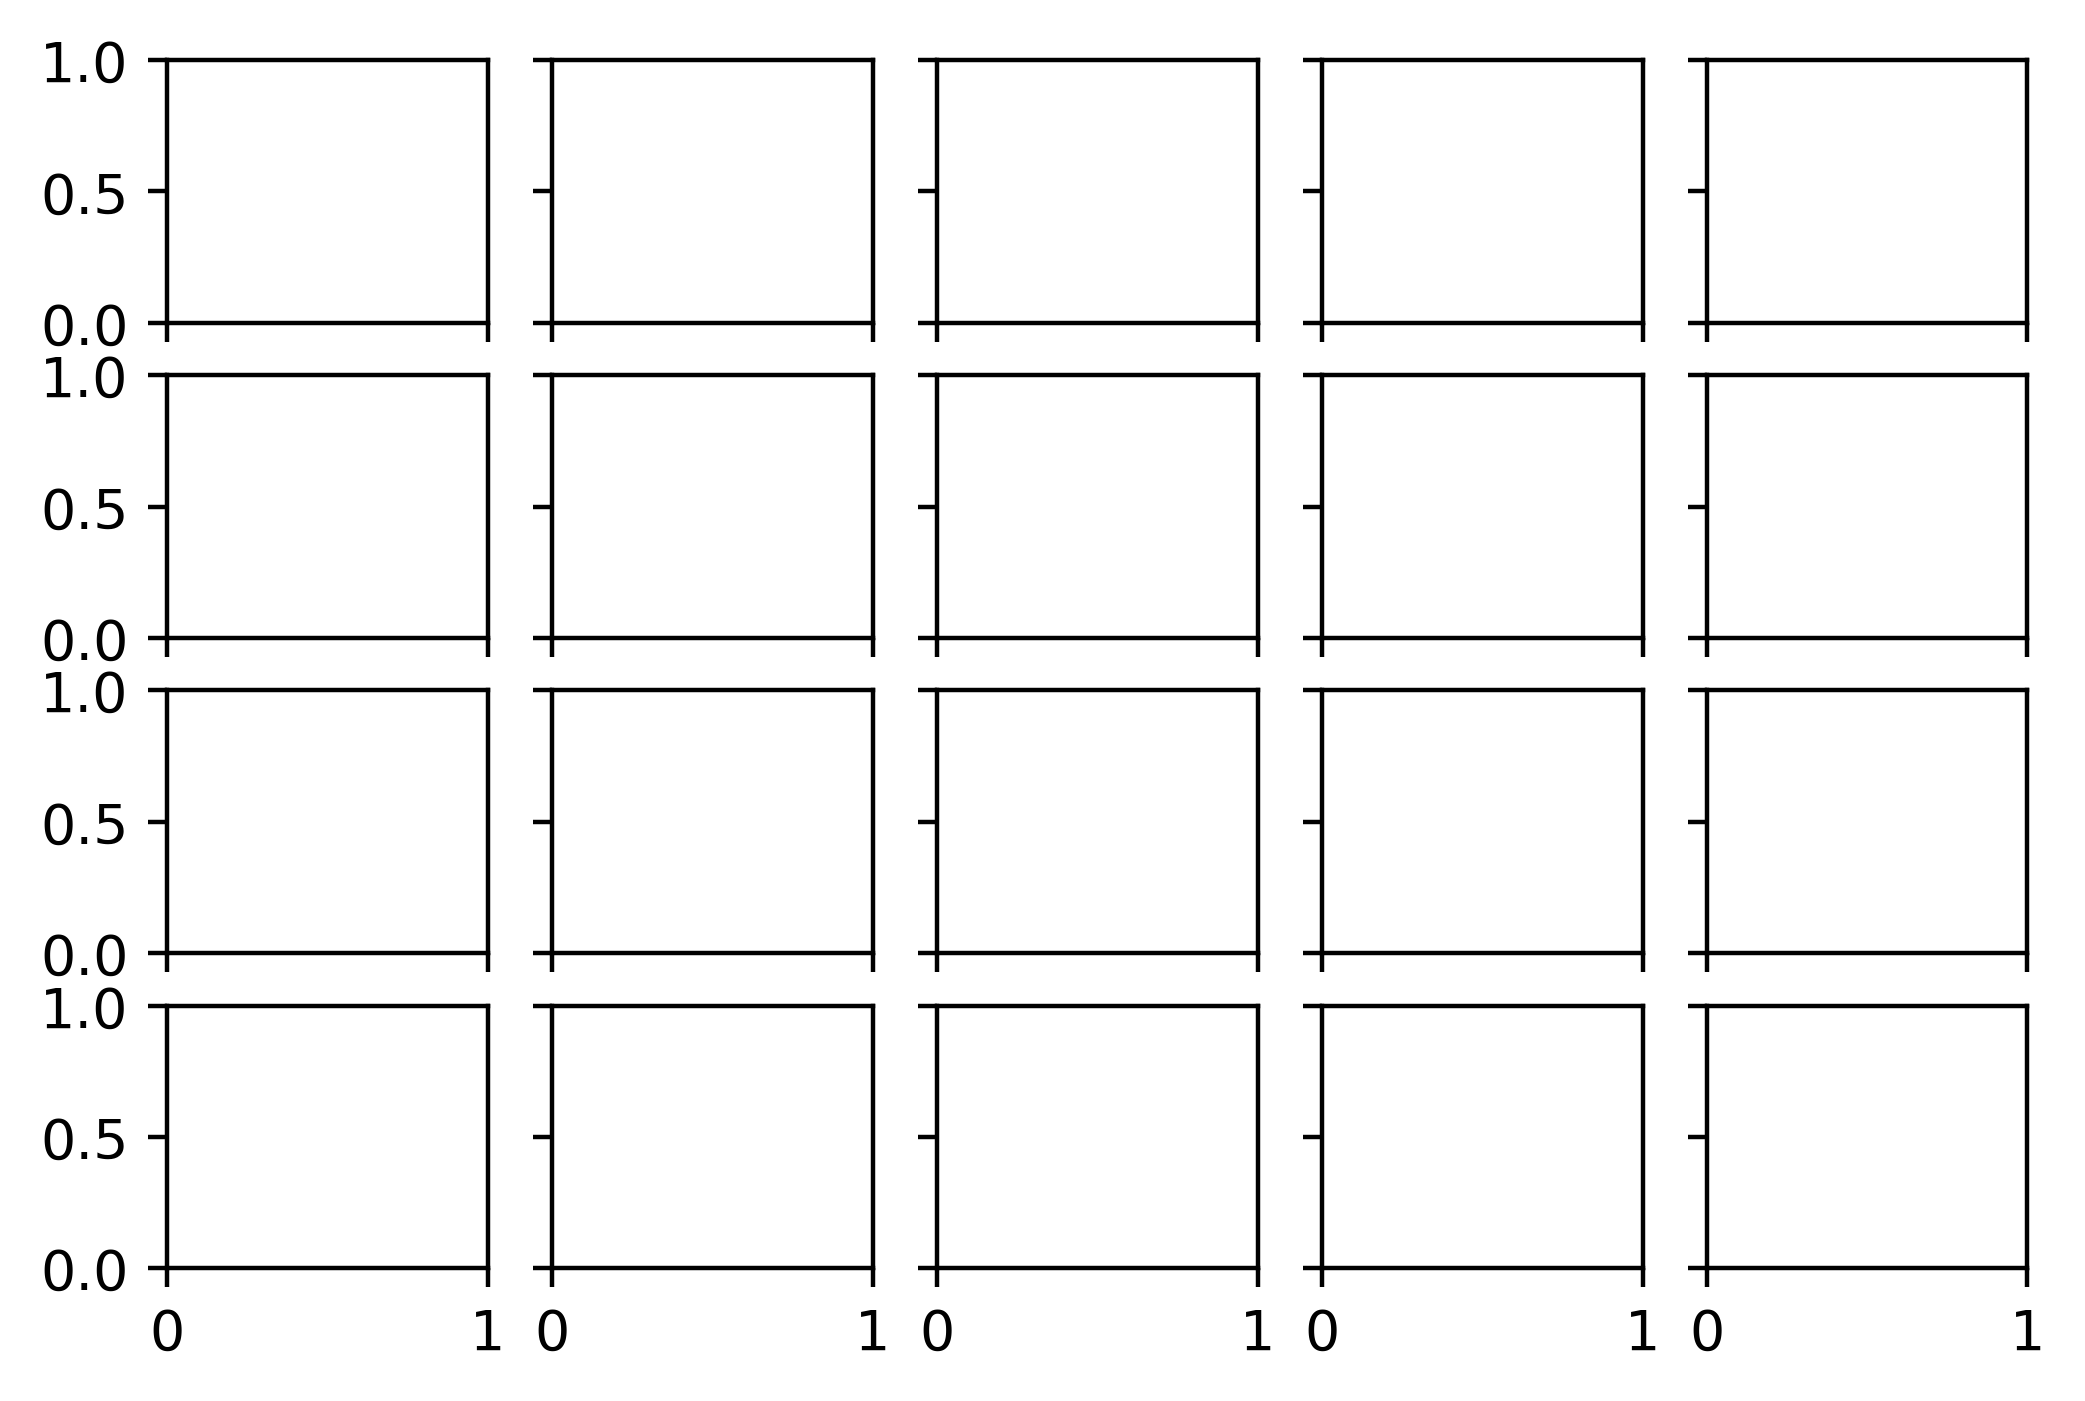

In [46]:
change_temp("mean", "Telangana")

In [645]:
%%time
for var in ["mean", "max", "min"]:
    for region in ["Telangana"]:
        change_temp(var, region, True)

CPU times: user 2min 25s, sys: 1min 28s, total: 3min 54s
Wall time: 1min 53s


In [ ]:
!ls ../plots/

In [ ]:
change_hotdays = dict()

In [296]:
change_hotdays

{'RCP45': {'2021-2050': '/tmp/cdoPy33za7vh0',
  '2061-2090': '/tmp/cdoPyhr7e5yay'},
 'RCP85': {'2021-2050': '/tmp/cdoPykknitqtl',
  '2061-2090': '/tmp/cdoPyq5brtox9'}}

In [1132]:
%%time
for scen in ["RCP45", "RCP85"]:
#     change_hotdays[scen] = dict()
    for tslice in ["2021-2050", "2061-2090"]:
#         change_hotdays[scen][tslice] = dict()
        for thresh in [40, 45]:
#             change_hotdays[scen][tslice][thresh] = dict()
            
            for seas in ['Annual']:
                
                if seas == "Annual":
                    FILE_NAME_FUT = merged[scen][tslice]
                    FILE_NAME_BASE = merged['HIST']
                    
                else:
                    FILE_NAME_FUT = f"-selseas,{seas} {merged[scen][tslice]}"
                    FILE_NAME_BASE = f"-selseas,{seas} {merged['HIST']}"
                    
            cmd = "-sub "
            cmd += f"-timsum -gtc,{thresh} -selvar,tasmax {FILE_NAME_FUT} "
            cmd += f"-timsum -gtc,{thresh} -selvar,tasmax {FILE_NAME_BASE}"

            change_hotdays[scen][tslice][thresh][seas] = cdo.divc("30",
                                                                   input=cmd,
                                                                   returnCDF=True)

CPU times: user 144 ms, sys: 704 ms, total: 848 ms
Wall time: 2min 26s


In [308]:
!rm /tmp/RCP45_2021-2050_Tmax40days_MAM.tiff

rm: cannot remove '/tmp/RCP45_2021-2050_Tmax40days_MAM.tiff': No such file or directory


In [309]:
!gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs "+proj=longlat +ellps=WGS84" \
NETCDF:"{change_hotdays["RCP45"]["2021-2050"][40]["MAM"]}":tasmax /tmp/RCP45_2021-2050_Tmax40days_MAM.tiff

Input file size is 135, 129
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
telangana2 = gpd.read_file("/home/abhi/Documents/data/shapefiles/Boundaries/District.shp")

In [324]:
ds.min()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    time_bnds  float64 3.092e+04
    tasmax     float64 -0.03333

In [340]:
scen = 'RCP45'
tslice = '2021-2050'
seas = 'MAM'

Text(0.43, 0.03, 'Fig. Additional number of days per year (MAM season)\nwith $T_{max}$ above 45$^\\circ$C for RCP4.5 scenario for the\nnear future (2021-2050).The figure is centered over\nthe telangana region.')

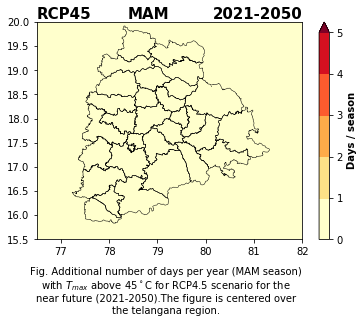

In [365]:
ds = xr.open_dataset(change_hotdays[scen][tslice][thresh][seas]).mean(["time", "bnds"])
fig, ax = plt.subplots()

plot = ds.tasmax.plot(ax=ax,
              levels=np.arange(0, 6, 1),
              cmap="YlOrRd", extend='max')

telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
ax.set_ylim(15.5, 20)
ax.set_xlim(76.5, 82)

ax.set_xlabel('')
ax.set_ylabel('')

plot.colorbar.set_label("Days / season", fontweight='bold')

xlims = ax.get_xlim()
ylims = ax.get_ylim()

ax.text(xlims[0], ylims[1],
        scen,
       ha='left', va='bottom',
       fontweight='bold',
       fontsize=15)

ax.text(xlims[1], ylims[1],
        tslice,
       ha='right', va='bottom',
       fontweight='bold',
       fontsize=15)

ax.text((xlims[0]+xlims[1])/2, ylims[1],
        seas,
       ha='right', va='bottom',
       fontweight='bold',
       fontsize=15)
caption = f"Fig. Additional number of days per year ({seas} season)\n"+\
           "with $T_{max}$ above "+str(thresh)+"$^\circ$C"+\
           f" for {scen[0:-1]}.{scen[-1]} scenario for the\nnear future ({tslice})."+\
           "The figure is centered over\nthe telangana region."
fig.text(0.43, 0.03,
        caption,
        ha='center',
        va='top')
# fig.savefig(f"../plots/{scen}_{tslice}_Tmax{thresh}days_{seas}.pdf",
#            dpi=400, bbox_inches='tight')

In [230]:
!cdo -divc,30 -sub \
-timsum -gtc,40 -selvar,tasmax {merged[scen][tslice]} \
-timsum -gtc,40 -selvar,tasmax {merged['HIST']} /tmp/numdays.nc

cdo(2) sub: Process started
cdo(3) timsum: Process started
cdo(4) gtc: Process started
cdo(5) selname: Process started
cdo(6) timsum: Process started
cdo(7) gtc: Process started
cdo(8) selname: Process started
cdo(8) selname: Processed 187037100 values from 3 variables over 10740 timesteps
cdo(7) gtc: Processed 187037100 values from 1 variable over 10740 timesteps
cdo(6) timsum: Processed 187037100 values from 1 variable over 10740 timesteps
cdo(5) selname: Processed 187037100 values from 3 variables over 10740 timesteps
cdo(4) gtc: Processed 187037100 values from 1 variable over 10740 timesteps
cdo(3) timsum: Processed 187037100 values from 1 variable over 10740 timesteps
cdo(2) sub: Processed 34830 values from 2 variables over 1 timestep
cdo divc: Processed 17415 values from 1 variable over 1 timestep [9.00s 33MB]


In [231]:
!ncview /tmp/numdays.nc

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for tasmax.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 2522 requests (2522 known processed) with 0 events remaining.


Text(0.5, 0.03, 'Fig. Additional number of days per year with $T_{max}$ above 40$^\\circ$C for two scenarios (RCP4.5 and RCP8.5), for the near future (2021-2050)\n and long term future (2061-2090). The figure is centered over the telangana region.')

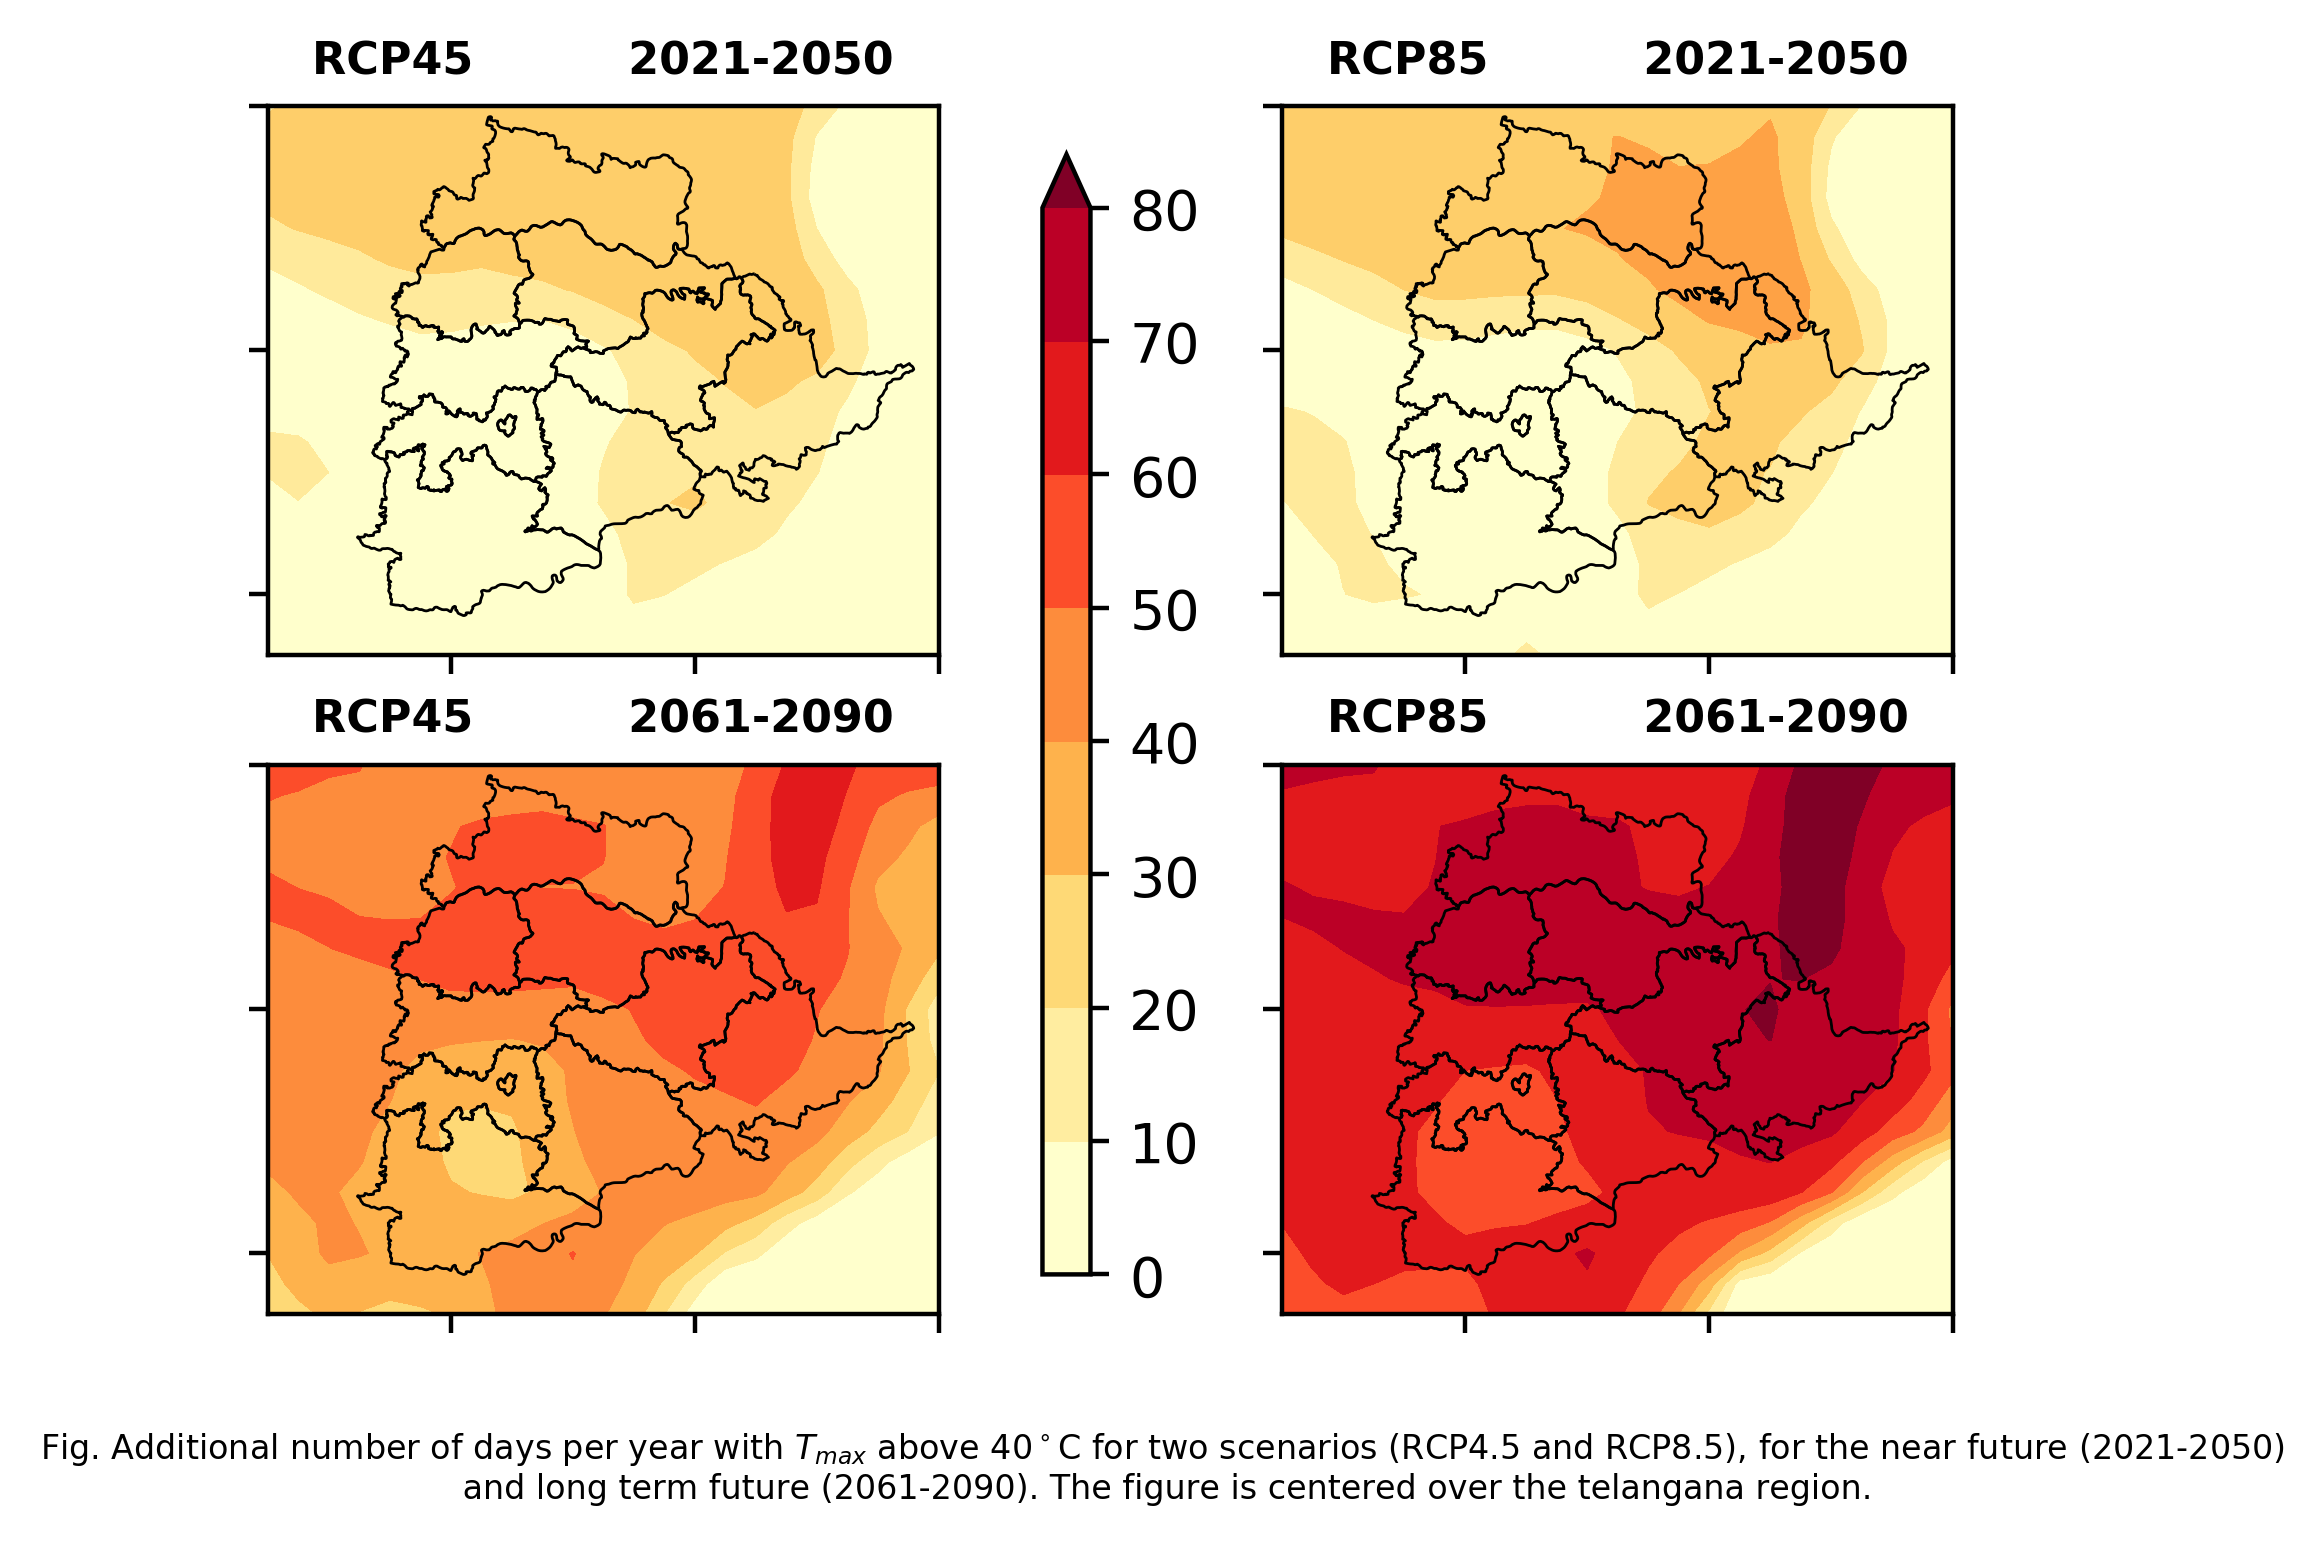

In [1139]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_hotdays[scen][tslice][40]['Annual']).mean(["bnds", "time"])
    plot = ds['tasmax'].plot.contourf(ax=ax,
                                     levels=np.arange(0,90,10),
                                     cmap="YlOrRd")
    telangana.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

caption = "Fig. Additional number of days per year with $T_{max}$ above 40$^\circ$C"+\
          " for two scenarios (RCP4.5 and RCP8.5), for the near future (2021-2050)\n"+\
          " and long term future (2061-2090). The figure is centered over the telangana region."

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

# fig.savefig("../plots/CORDEX_change_Tmax40days_Telagana.pdf", dpi=400)

In [368]:
cdo.ndate(input=merged['HIST'])[0]

'10740'

In [544]:
%%time
# change_percdays = dict()
for scen in ["RCP45", "RCP85"]:
#     change_percdays[scen] = dict()
    for tslice in ["2021-2050", "2061-2090"]:
#         change_percdays[scen][tslice] = dict()
        for perc in [90, 95]:
            change_percdays[scen][tslice][perc]  = dict()
            
            for seas in ["Annual"]:
                
                if seas == "Annual":
                    FILE_NAME_FUT = merged[scen][tslice]
                    FILE_NAME_BASE = merged['HIST']
                    
                else:
                    FILE_NAME_FUT = f"-selseas,{seas} {merged[scen][tslice]}"
                    FILE_NAME_BASE = f"-selseas,{seas} {merged['HIST']}"
                    
                    
                cmd = f"{FILE_NAME_BASE} "
                cmd += f"-timmin {FILE_NAME_BASE} "
                cmd += f"-timmax {FILE_NAME_BASE}"

                perc_file = cdo.timpctl(str(perc),
                                       input=cmd)
                
                fut_days = int(cdo.ndate(input=FILE_NAME_FUT)[0])

                cmd = f"-divc,{fut_days} -timsum -gtc,0 "
                cmd += f"-sub {FILE_NAME_FUT} {perc_file}"

                change_percdays[scen][tslice][perc][seas] = cdo.mulc("100",
                                                                       input=cmd,
                                                                       returnCDF=True)



CPU times: user 632 ms, sys: 2.9 s, total: 3.53 s
Wall time: 11min 6s


In [533]:
!ncview {change_percdays['RCP45']['2061-2090'][95]['MAM']}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for tasmax.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 1857 requests (1857 known processed) with 0 events remaining.


In [400]:
!pwd

/home/abhi/Documents/mygit/CORDEX_EnsMean/output


In [402]:
out_dir = "/home/abhi/Documents/mygit/CORDEX_EnsMean/files"

In [406]:
for scen in ["RCP45", "RCP85"]:
    ds = change_hotdays[scen]["2021-2050"][40]["MAM"]
    cmd = 'gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs "+proj=longlat +ellps=WGS84" '+\
          f'NETCDF:"{ds}":tasmax {out_dir}/{scen}_2021-2050_Tmax40days_MAM.tiff'
    os.system(cmd)

In [407]:
for scen in ["RCP45", "RCP85"]:
    for perc in [90, 95]:
        ds = change_percdays[scen]["2021-2050"][perc]["MAM"]
        cmd = 'gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs "+proj=longlat +ellps=WGS84" '+\
              f'NETCDF:"{ds}":tasmax {out_dir}/{scen}_2021-2050_Tmax{perc}pdays_MAM.tiff'
        os.system(cmd)

In [404]:
cmd

'gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs "+proj=longlat +ellps=WGS84"NETCDF:"/tmp/cdoPym3zmewbj":tasmax /home/abhi/Documents/mygit/CORDEX_EnsMean/files/2021-2050_2021-2050_Tmax40days_MAM.tiff'

In [377]:
ds = xr.open_dataset(change_percdays['RCP45']['2021-2050'][90]['MAM']).mean(["bnds", "time"])

In [389]:
ds.max()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    time_bnds  float64 3.092e+04
    tas        float64 93.26
    tasmax     float64 94.22
    tasmin     float64 84.3

Text(0.43, 0.03, 'Fig. Percentage of days in MAM with $T_{max}$ above 90$^{th}$ percentile for RCP4.5 scenario for the\nnear future (2021-2050).The figure is centered over\nthe telangana region.')

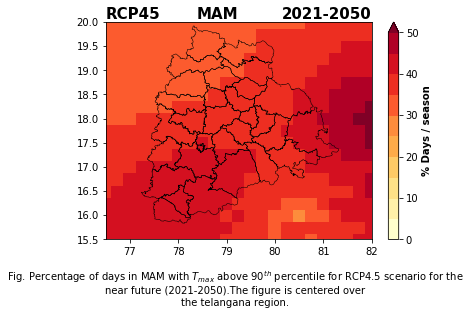

In [392]:
ds = xr.open_dataset(change_percdays[scen][tslice][perc][seas]).mean(["bnds", "time"])
fig, ax = plt.subplots()

plot = ds.tasmax.plot(ax=ax,
              levels=np.arange(0, 55, 5),
              cmap="YlOrRd", extend='max')

telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
ax.set_ylim(15.5, 20)
ax.set_xlim(76.5, 82)

ax.set_xlabel('')
ax.set_ylabel('')

plot.colorbar.set_label("% Days / season", fontweight='bold')

xlims = ax.get_xlim()
ylims = ax.get_ylim()

ax.text(xlims[0], ylims[1],
        scen,
       ha='left', va='bottom',
       fontweight='bold',
       fontsize=15)

ax.text(xlims[1], ylims[1],
        tslice,
       ha='right', va='bottom',
       fontweight='bold',
       fontsize=15)

ax.text((xlims[0]+xlims[1])/2, ylims[1],
        seas,
       ha='right', va='bottom',
       fontweight='bold',
       fontsize=15)
caption = f"Fig. Percentage of days in {seas} with"+" $T_{max}$ "+\
          f"above {perc}"+\
           "$^{th}$ percentile"+\
           f" for {scen[0:-1]}.{scen[-1]} scenario for the\nnear future ({tslice})."+\
           "The figure is centered over\nthe telangana region."
fig.text(0.43, 0.03,
        caption,
        ha='center',
        va='top')

KeyError: '2061-2090'

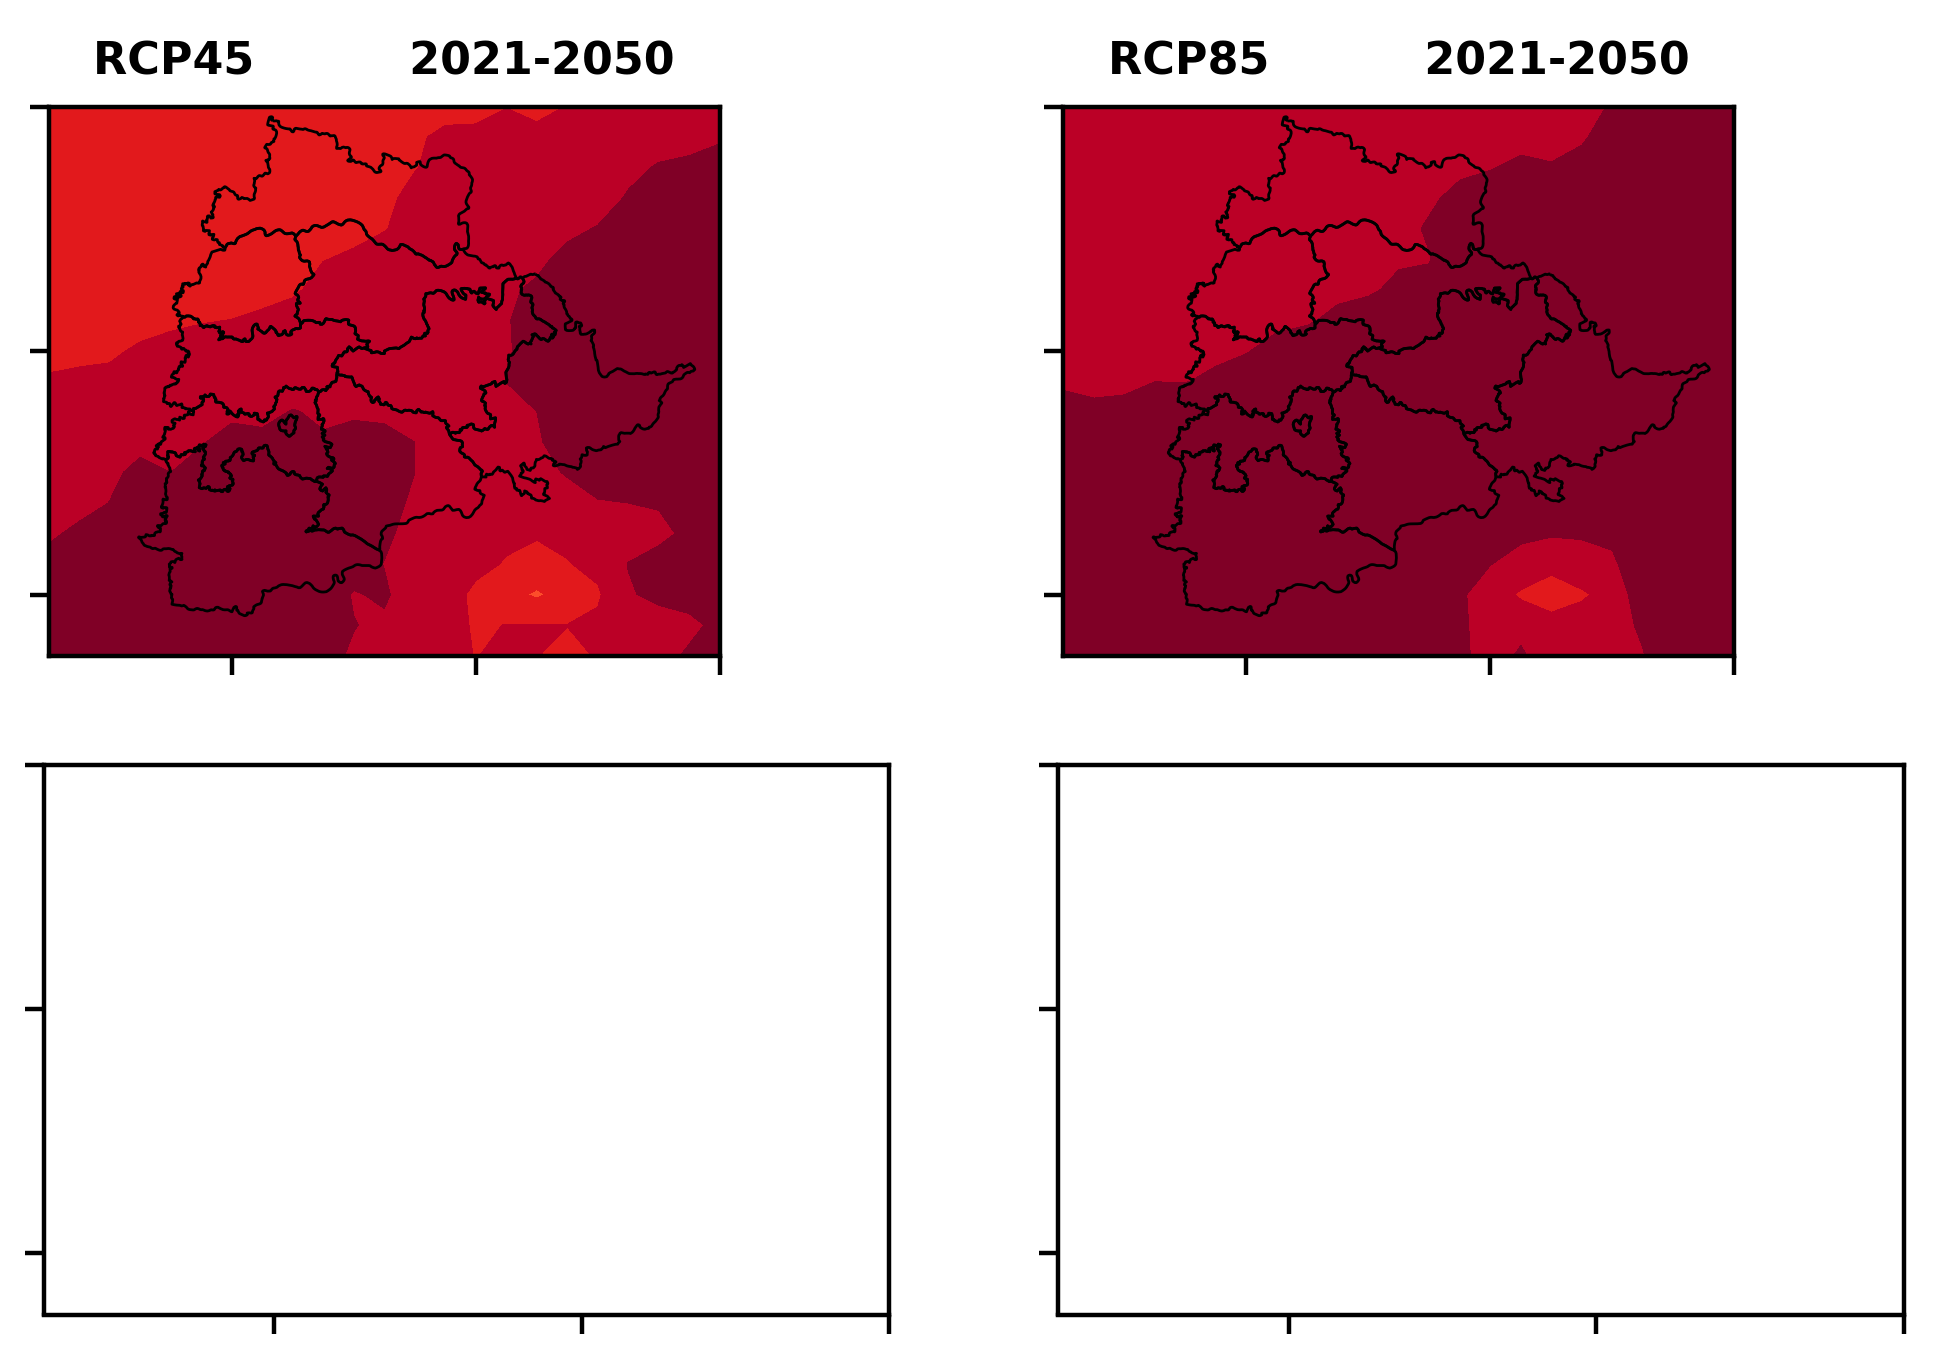

In [372]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

perc = 90

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_percdays[scen][tslice][perc]).mean(["bnds", "time"])
    plot = ds['tasmax'].plot.contourf(ax=ax,
                                     levels=np.arange(0,45,5),
                                     cmap="YlOrRd")
    telangana.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

caption = "Fig. Percentage of days with $T_{max}$ above "+str(perc)+"$^{th}$"+\
          " percentile calculated from baseline simulation (1971-2000)."+\
          " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
          " and long term future (2061-2090). The figure is centered over the telangana region."

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

# fig.savefig(f"../plots/CORDEX_change_Tmax{perc}pdays_Telagana.pdf", dpi=400)

In [289]:
seasons = ["Annual", "JJAS", "ON", "DJF", "MAM"]

In [294]:
same_dict = {90 : {'2021-2050': {seas: [] for seas in seasons}, 
                  '2061-2090': {seas: [] for seas in seasons}}, 
             95 : {'2021-2050': {seas: [] for seas in seasons},
                  '2061-2090': {seas: [] for seas in seasons}}}

change_nthval = dict(RCP45=deepcopy(same_dict),
                     RCP85=deepcopy(same_dict))



In [295]:
%%time
for scen in ["RCP45", "RCP85"]:
    for q in [90, 95]:
        for tslice in ['2021-2050', '2061-2090']:
            for seas in seasons:
                if seas == "Annual":
                    file_name_fut = merged[scen][tslice]
                    file_name_base = merged['HIST']
                else:
                    file_name_fut = f"-selseas,{seas} {merged[scen][tslice]}"
                    file_name_base = f"-selseas,{seas} {merged['HIST']}"

                perc_file_fut = cdo.timpctl(str(q), 
                                             input=f"{file_name_fut} "+\
                                                   f"-timmin {file_name_fut} "+\
                                                   f"-timmax {file_name_fut}",
                                           returnCDF=True)

                perc_file_base = cdo.timpctl(str(q), 
                                             input=f"{file_name_base} "+\
                                                   f"-timmin {file_name_base} "+\
                                                   f"-timmax {file_name_base}",
                                            returnCDF=True)

                cmd = f"-div -sub {perc_file_fut} {perc_file_base} {perc_file_base}"

                change_nthval[scen][q][tslice_key][seas] = cdo.mulc("100",
                                                                        input=cmd, returnCDF=True)



NameError: name 'tslice_key' is not defined

In [437]:
def eca_csu(thresh, ndays, fut_file, base_file, 
            kel2C=True, percentage=False):
    
    sims = {'base': base_file, 'fut': fut_file}
    getcmd = lambda sim: f"-eca_csu,{thresh},{ndays} -addc,273.15 {sims[sim]}"
    
    if percentage:
        cmd = f"-div -sub {getcmd('fut')} {getcmd('base')} {getcmd('base')}"
        res = cdo.mulc("100",
                 input=cmd,
                 returnCDF=True)
        
    else:
        var_name = f"number_of_csu_periods_with_more_than_{ndays}days_per_time_period"
        
        cmd = f"-selvar,{var_name} -sub {getcmd('fut')} {getcmd('base')}"
        res = cdo.setname(f"change_csu_{thresh}_{ndays}", 
                          input=cmd,
               returnCDF=True)
        
        
    return res
        
    
    

In [440]:
seas = 'MAMJ'
scen = 'RCP45'

fut_file = f"-selseas,{seas} -selvar,tasmax {merged[scen]['2021-2050']}"
base_file = f"-selseas,{seas} -selvar,tasmax {merged['HIST']}"


f = eca_csu(40, 3, fut_file, base_file, percentage=False)

In [443]:
!ncview {f}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for change_csu_40_3.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 988 requests (988 known processed) with 0 events remaining.


In [445]:
for scen in ["RCP45", "RCP85"]:
    fut_file = f"-selseas,{seas} -selvar,tasmax {merged[scen]['2021-2050']}"
    base_file = f"-selseas,{seas} -selvar,tasmax {merged['HIST']}"
    
    ds = eca_csu(40, 3, fut_file, 
                 base_file, 
                 percentage=False)
    
    cmd = 'gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs "+proj=longlat +ellps=WGS84" '+\
          f'NETCDF:"{ds}":change_csu_40_3 {out_dir}/{scen}_2021-2050_CSU40_3day_MAMJ.tiff'
    
    os.system(cmd)

In [446]:
!ncview {ds}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for change_csu_40_3.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 1207 requests (1207 known processed) with 0 events remaining.


### Relevant plots


#### change_hotdays $40^\circ C$

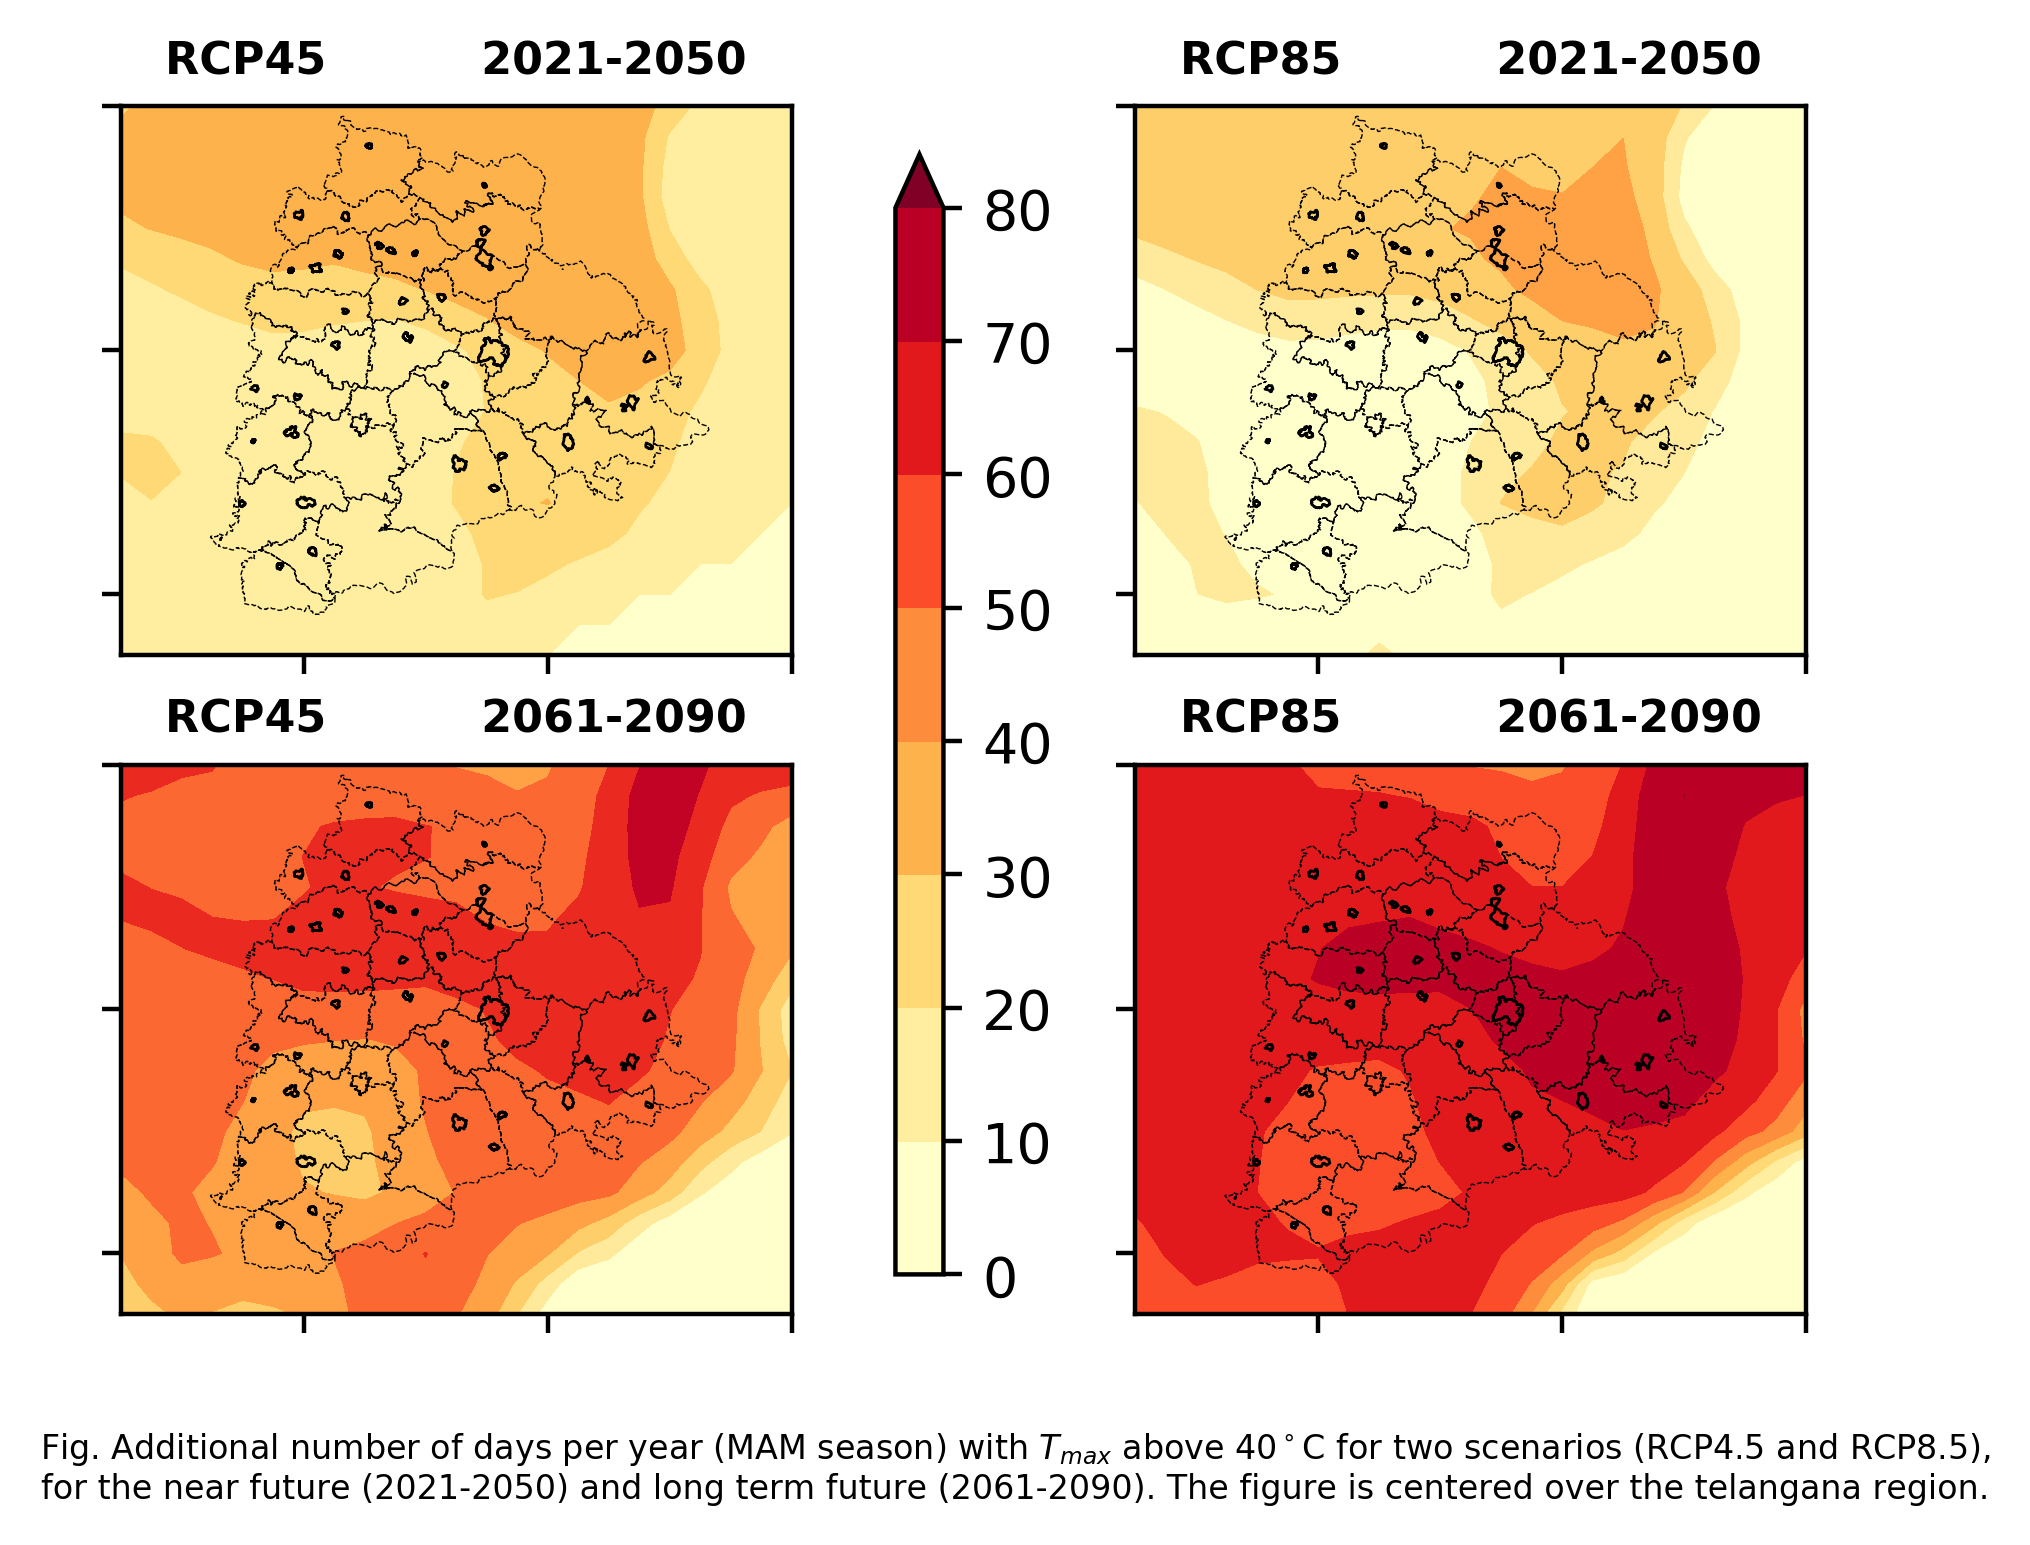

In [524]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()
type_plot = 'Additional'
seas = 'MAM'
thresh = 40

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

perc = 90

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_hotdays[scen][tslice][thresh][seas]).mean(["bnds", "time"])
    plot = ds['tasmax'].plot.contourf(ax=ax,
                                     levels=np.arange(0,90,10),
                                     cmap="YlOrRd")
    telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.25, linestyle="--", ax=ax)
    shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

if type_plot is 'Additional':
    caption = f"Fig. Additional number of days per year ({seas} season) "+\
               "with $T_{max}$ above "+str(thresh)+"$^\circ$C"+\
               " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
               " and long term future (2061-2090). The figure is centered over the telangana region."
else:    
    caption = "Fig. Percentage of days with $T_{max}$ above "+str(perc)+"$^{th}$"+\
              " percentile calculated from baseline simulation (1971-2000)."+\
              " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
              " and long term future (2061-2090). The figure is centered over the telangana region."
    

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

savename = 'CORDEX_Tmax40days_MAM.png'
fig.savefig(f"../plots/{savename}", dpi=400, bbox_inches="tight")

#### change_perc days

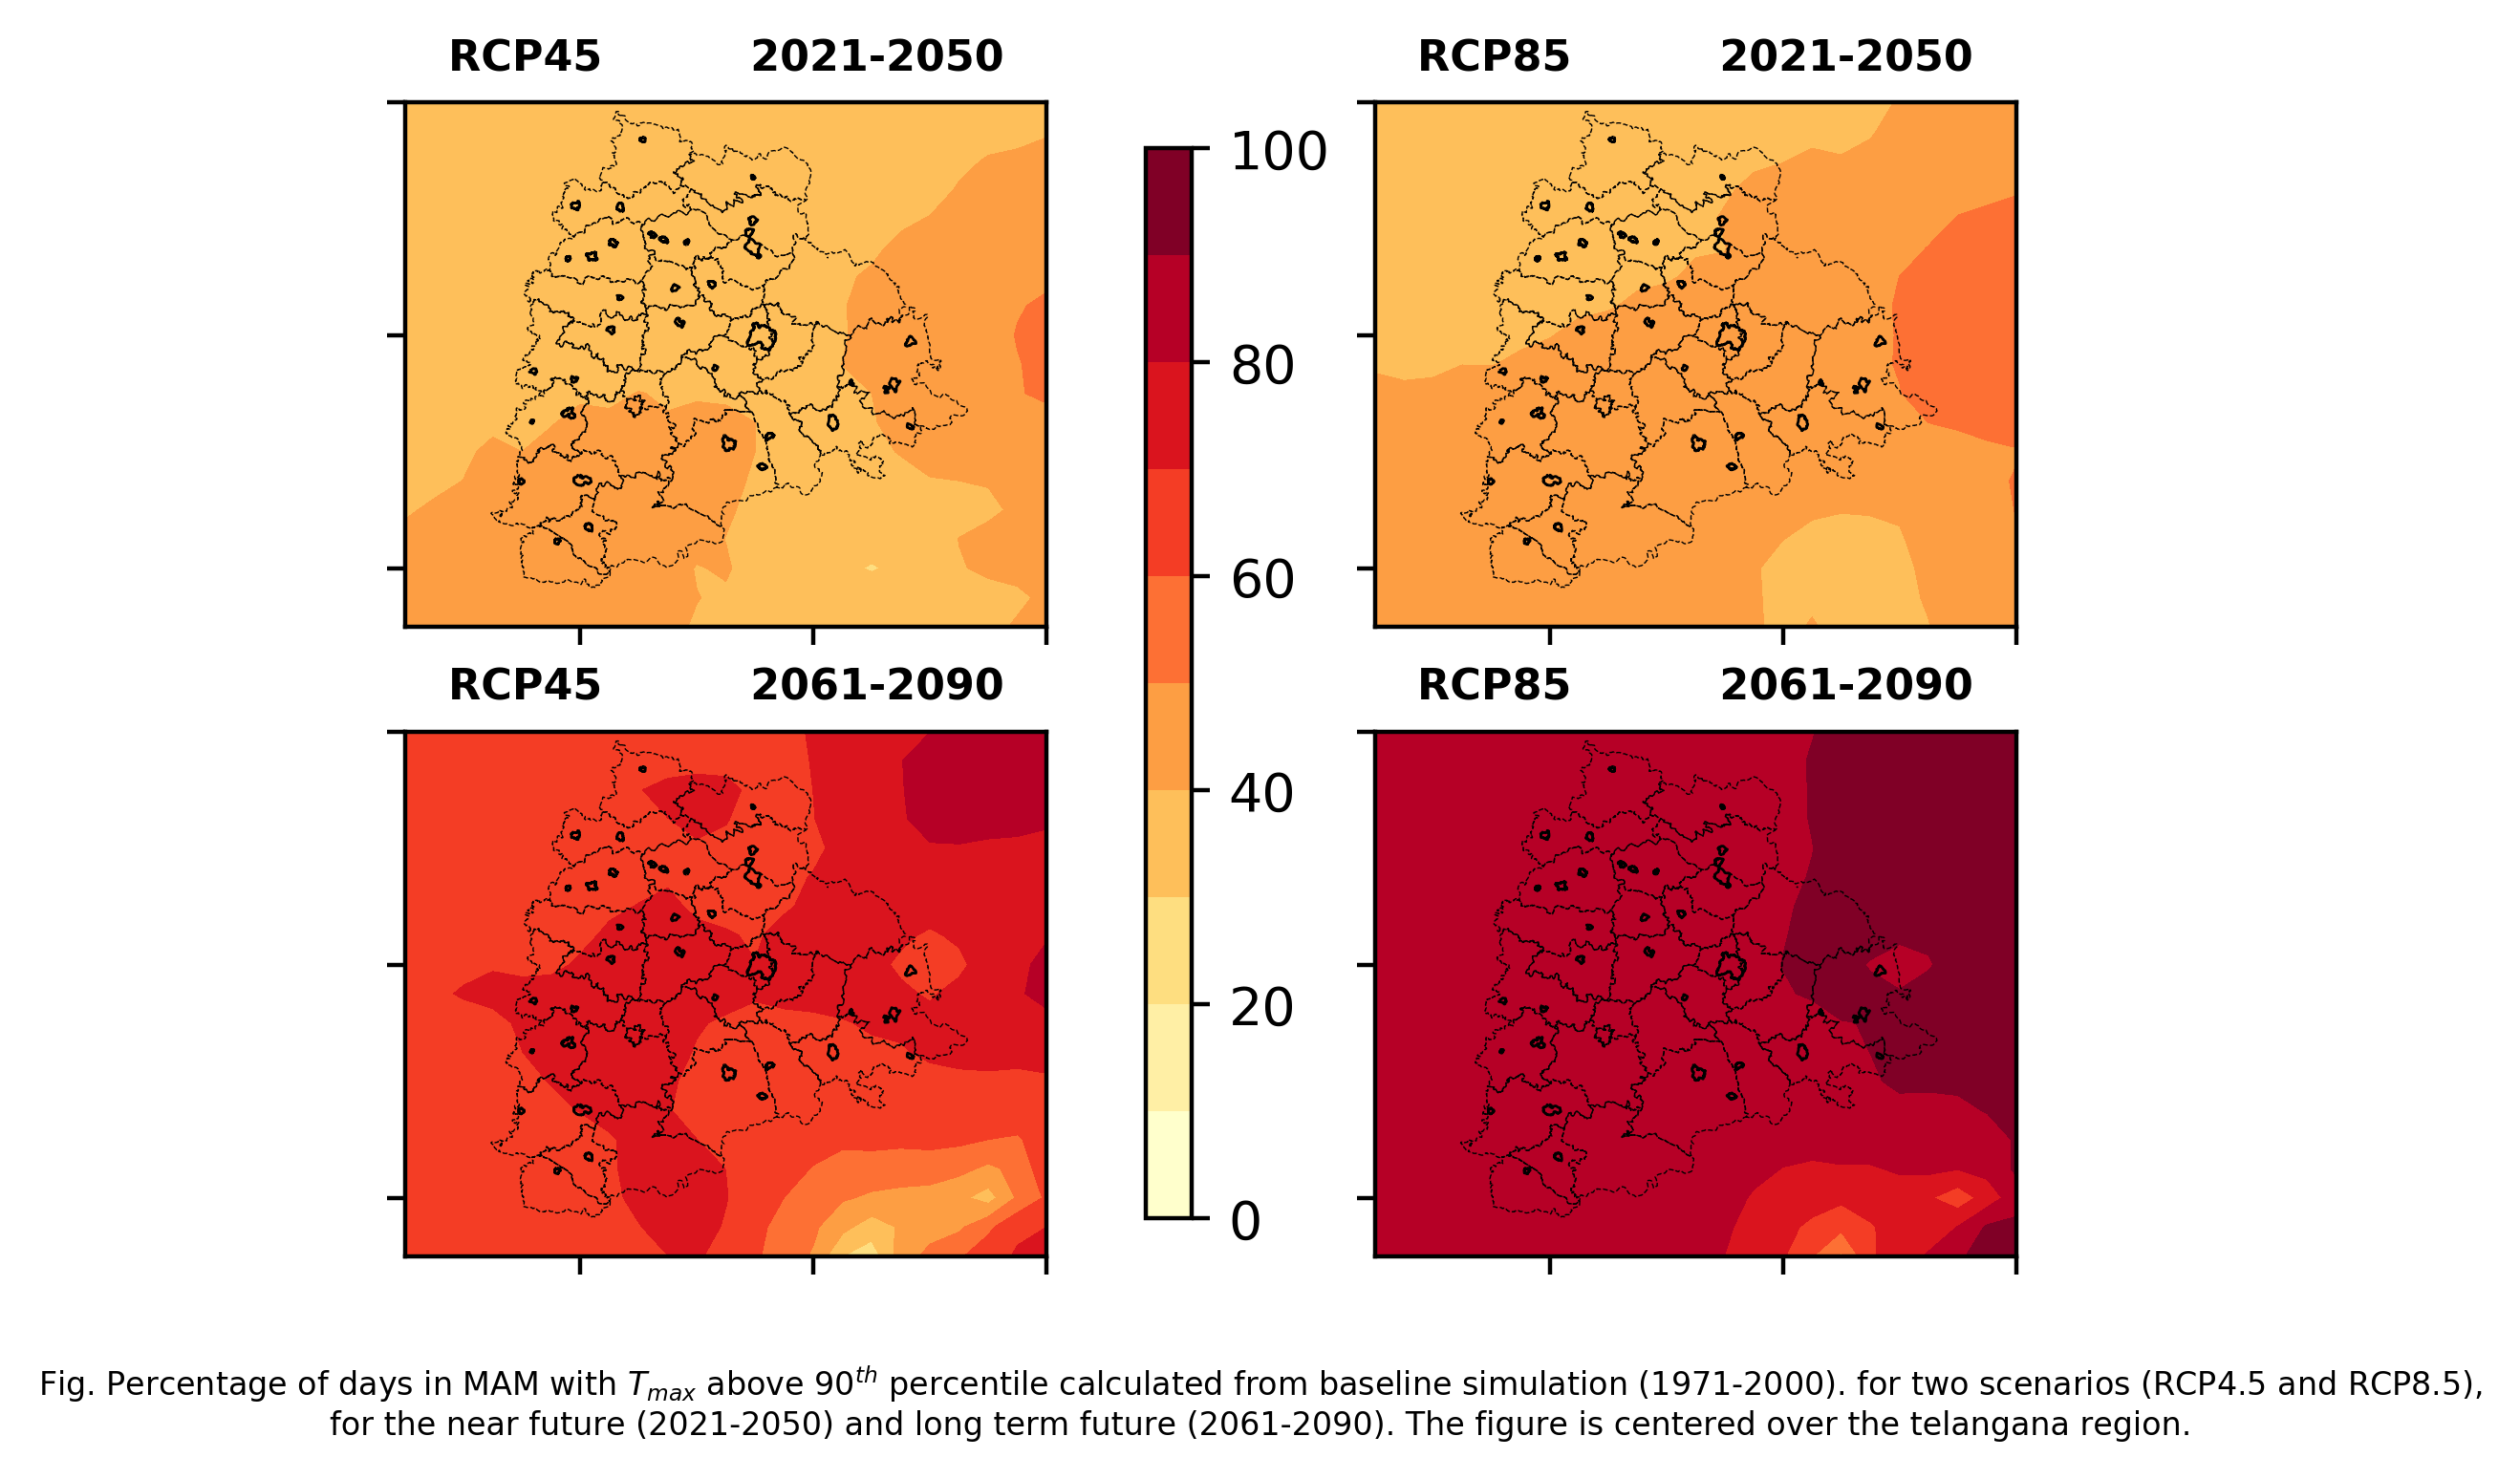

In [539]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()
type_plot = 'perc'
seas = 'MAM'
thresh = 90

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

perc = 90

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_percdays[scen][tslice][thresh][seas]).mean(["bnds", "time"])
    plot = ds['tasmax'].plot.contourf(ax=ax,
                                     levels=np.arange(0,110,10),
                                     cmap="YlOrRd")
    telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.25, linestyle="--", ax=ax)
    shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

if type_plot is 'Additional':
    caption = f"Fig. Additional number of days per year ({seas} season) "+\
               "with $T_{max}$ above "+str(thresh)+"$^\circ$C"+\
               " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
               " and long term future (2061-2090). The figure is centered over the telangana region."
else:    
    caption = "Fig. Percentage of days in MAM with $T_{max}$ above "+str(perc)+"$^{th}$"+\
              " percentile calculated from baseline simulation (1971-2000)."+\
              " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
              " and long term future (2061-2090). The figure is centered over the telangana region."
    

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

savename = f'CORDEX_Tmax{thresh}p_MAM.png'
fig.savefig(f"../plots/{savename}", dpi=400, bbox_inches="tight")

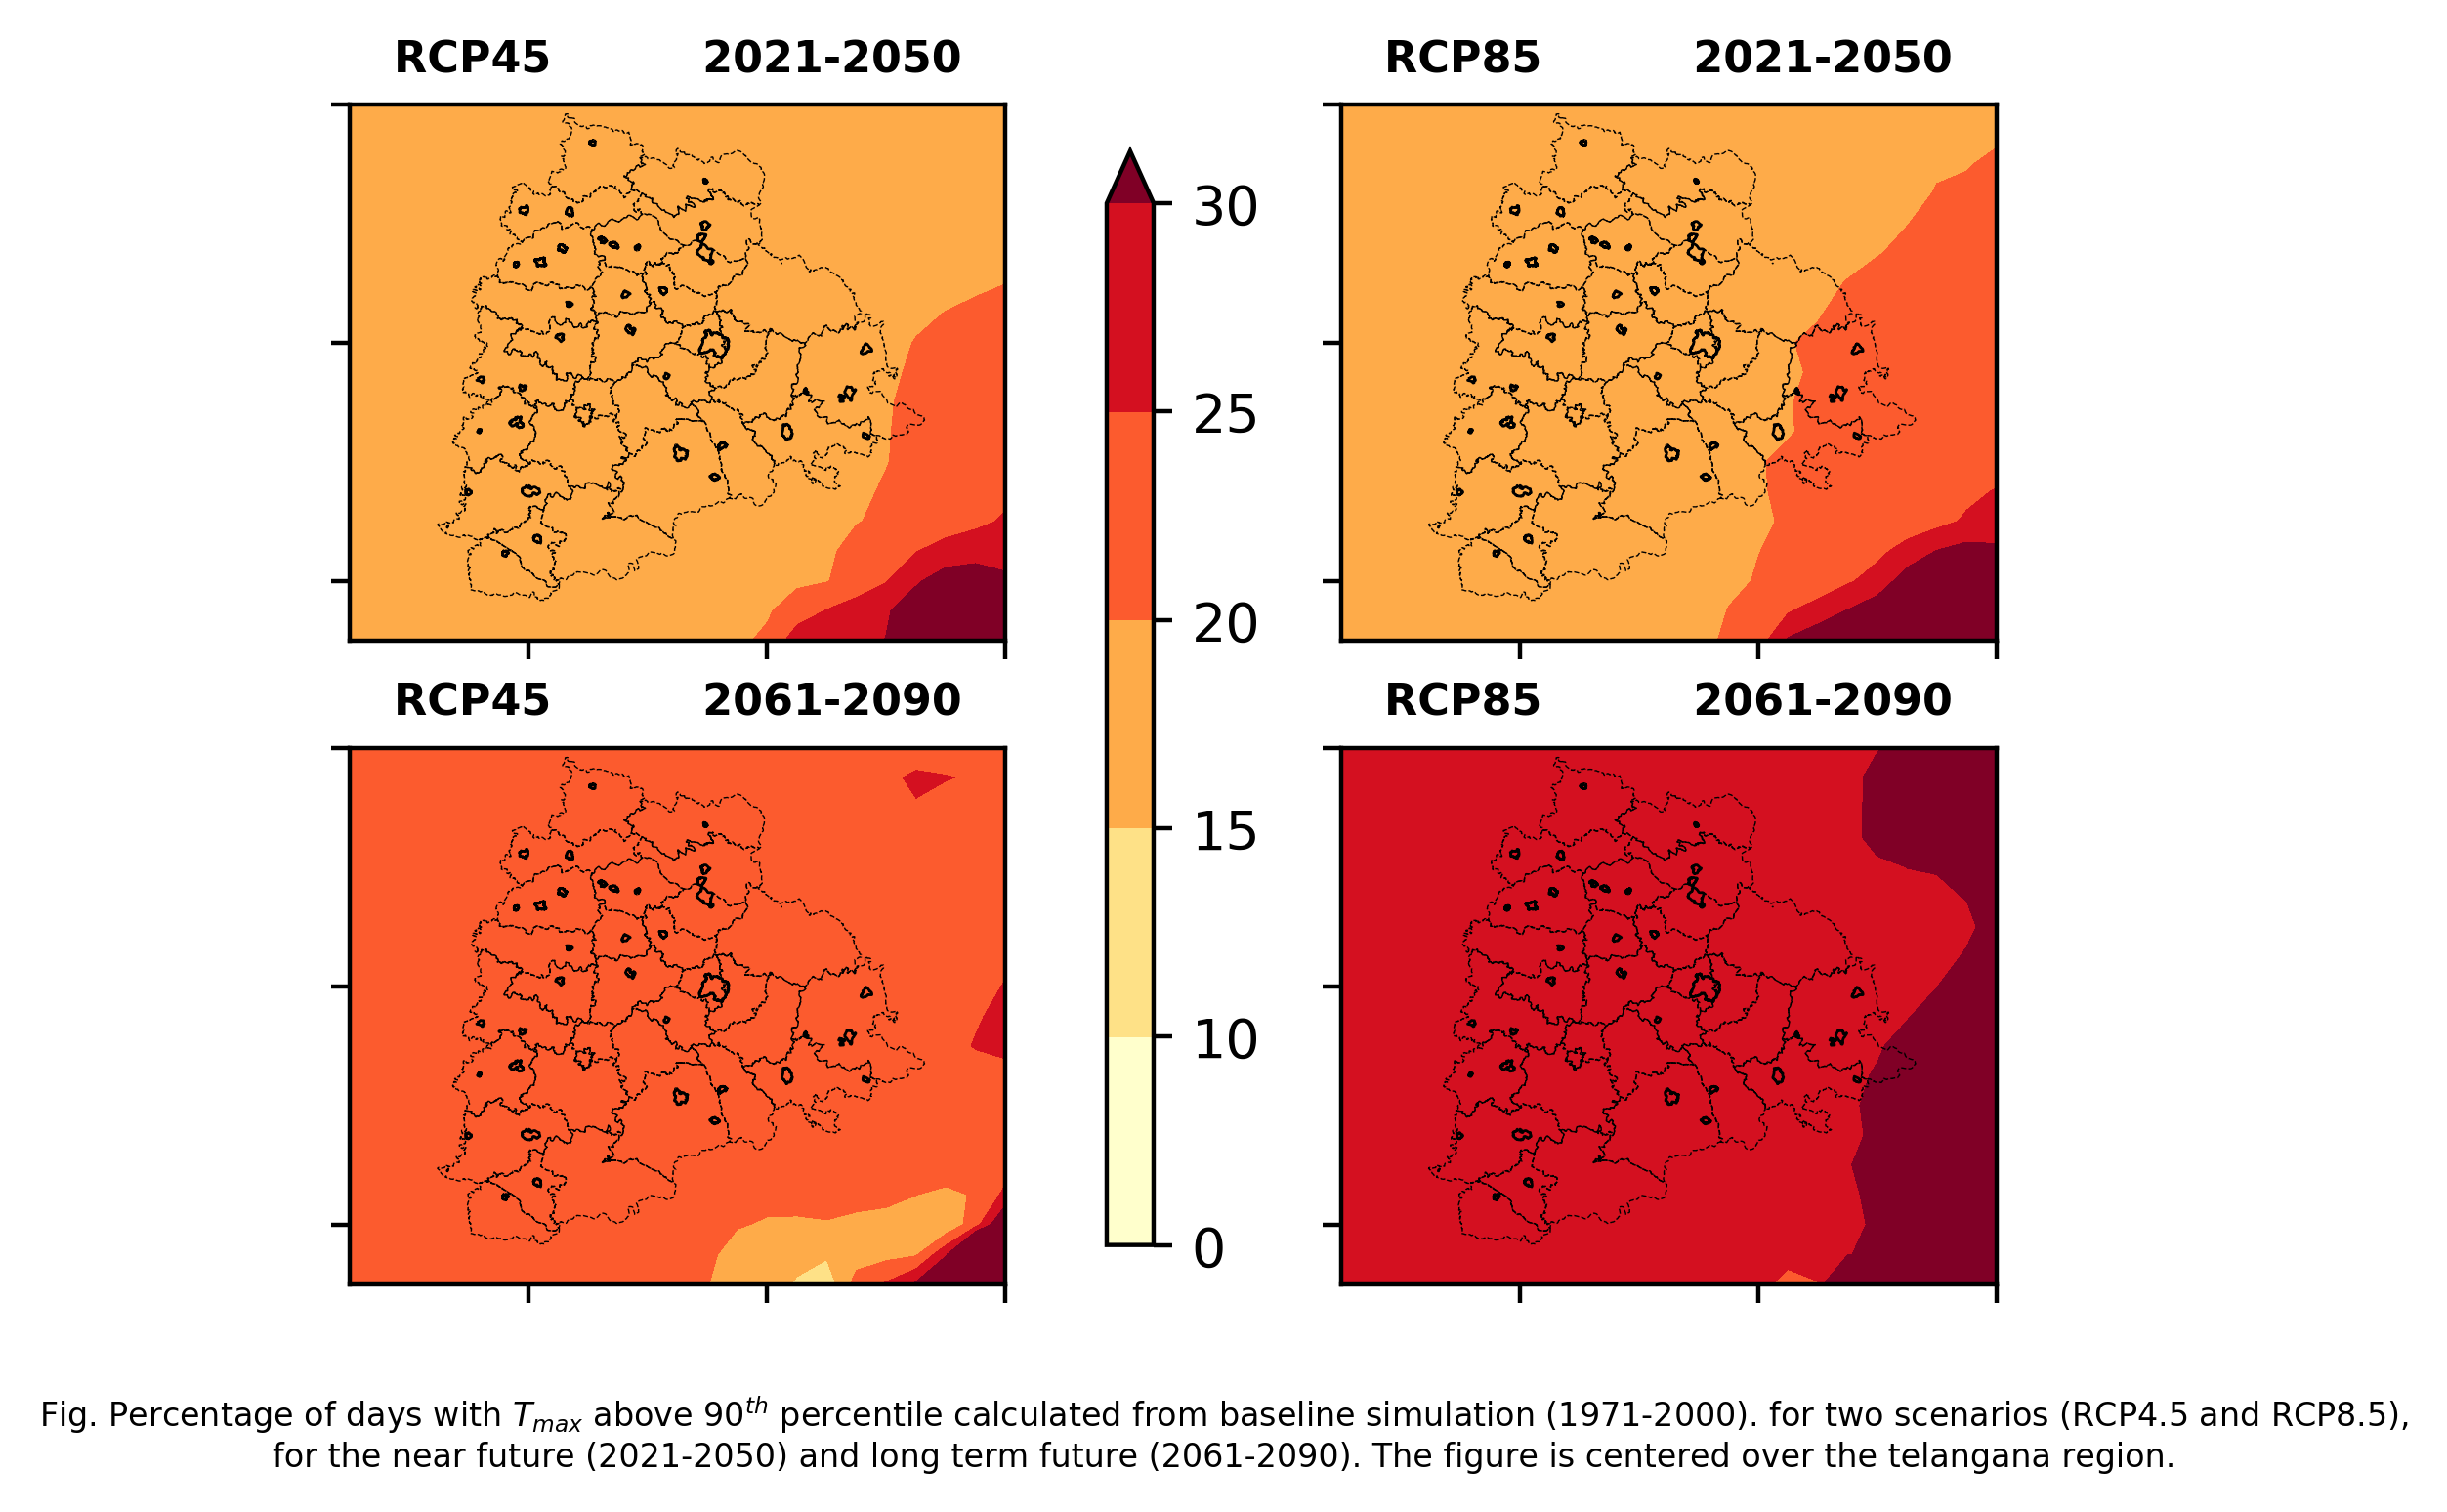

In [557]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()
type_plot = 'perc'
seas = 'Annual'
thresh = 90

if thresh is 90:
    levels = [0, 10] + list(range(15, 35, 5))
    
elif thresh is 95:
    levels = [0, 5] + list(range(10, 30, 5))
    
    
plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_percdays[scen][tslice][thresh][seas]).mean(["bnds", "time"])
    plot = ds['tasmax'].plot.contourf(ax=ax,
                                     levels=levels,
                                     cmap="YlOrRd")
    telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.25, linestyle="--", ax=ax)
    shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

if type_plot is 'Additional':
    caption = f"Fig. Additional number of days per year ({seas} season) "+\
               "with $T_{max}$ above "+str(thresh)+"$^\circ$C"+\
               " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
               " and long term future (2061-2090). The figure is centered over the telangana region."
else:    
    caption = "Fig. Percentage of days with $T_{max}$ above "+str(thresh)+"$^{th}$"+\
              " percentile calculated from baseline simulation (1971-2000)."+\
              " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
              " and long term future (2061-2090). The figure is centered over the telangana region."
    

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

savename = f'CORDEX_Tmax{thresh}p_Annual.png'
fig.savefig(f"../plots/{savename}", dpi=400, bbox_inches="tight")

In [560]:
precip_change_percdays = {'RCP45': {'2021-2050': {90: {'JJAS': '/tmp/cdoPyxhqfy812'},
                           95: {'JJAS': '/tmp/cdoPy4lh08del'}},
                          '2061-2090': {90: {'JJAS': '/tmp/cdoPypub2dolk'},
                           95: {'JJAS': '/tmp/cdoPyy6vcjiko'}}},
                         'RCP85': {'2021-2050': {90: {'JJAS': '/tmp/cdoPylh8u76ze'},
                           95: {'JJAS': '/tmp/cdoPylzfx8a7c'}},
                          '2061-2090': {90: {'JJAS': '/tmp/cdoPy3js0uf7z'},
                           95: {'JJAS': '/tmp/cdoPywov8u3u1'}}}}

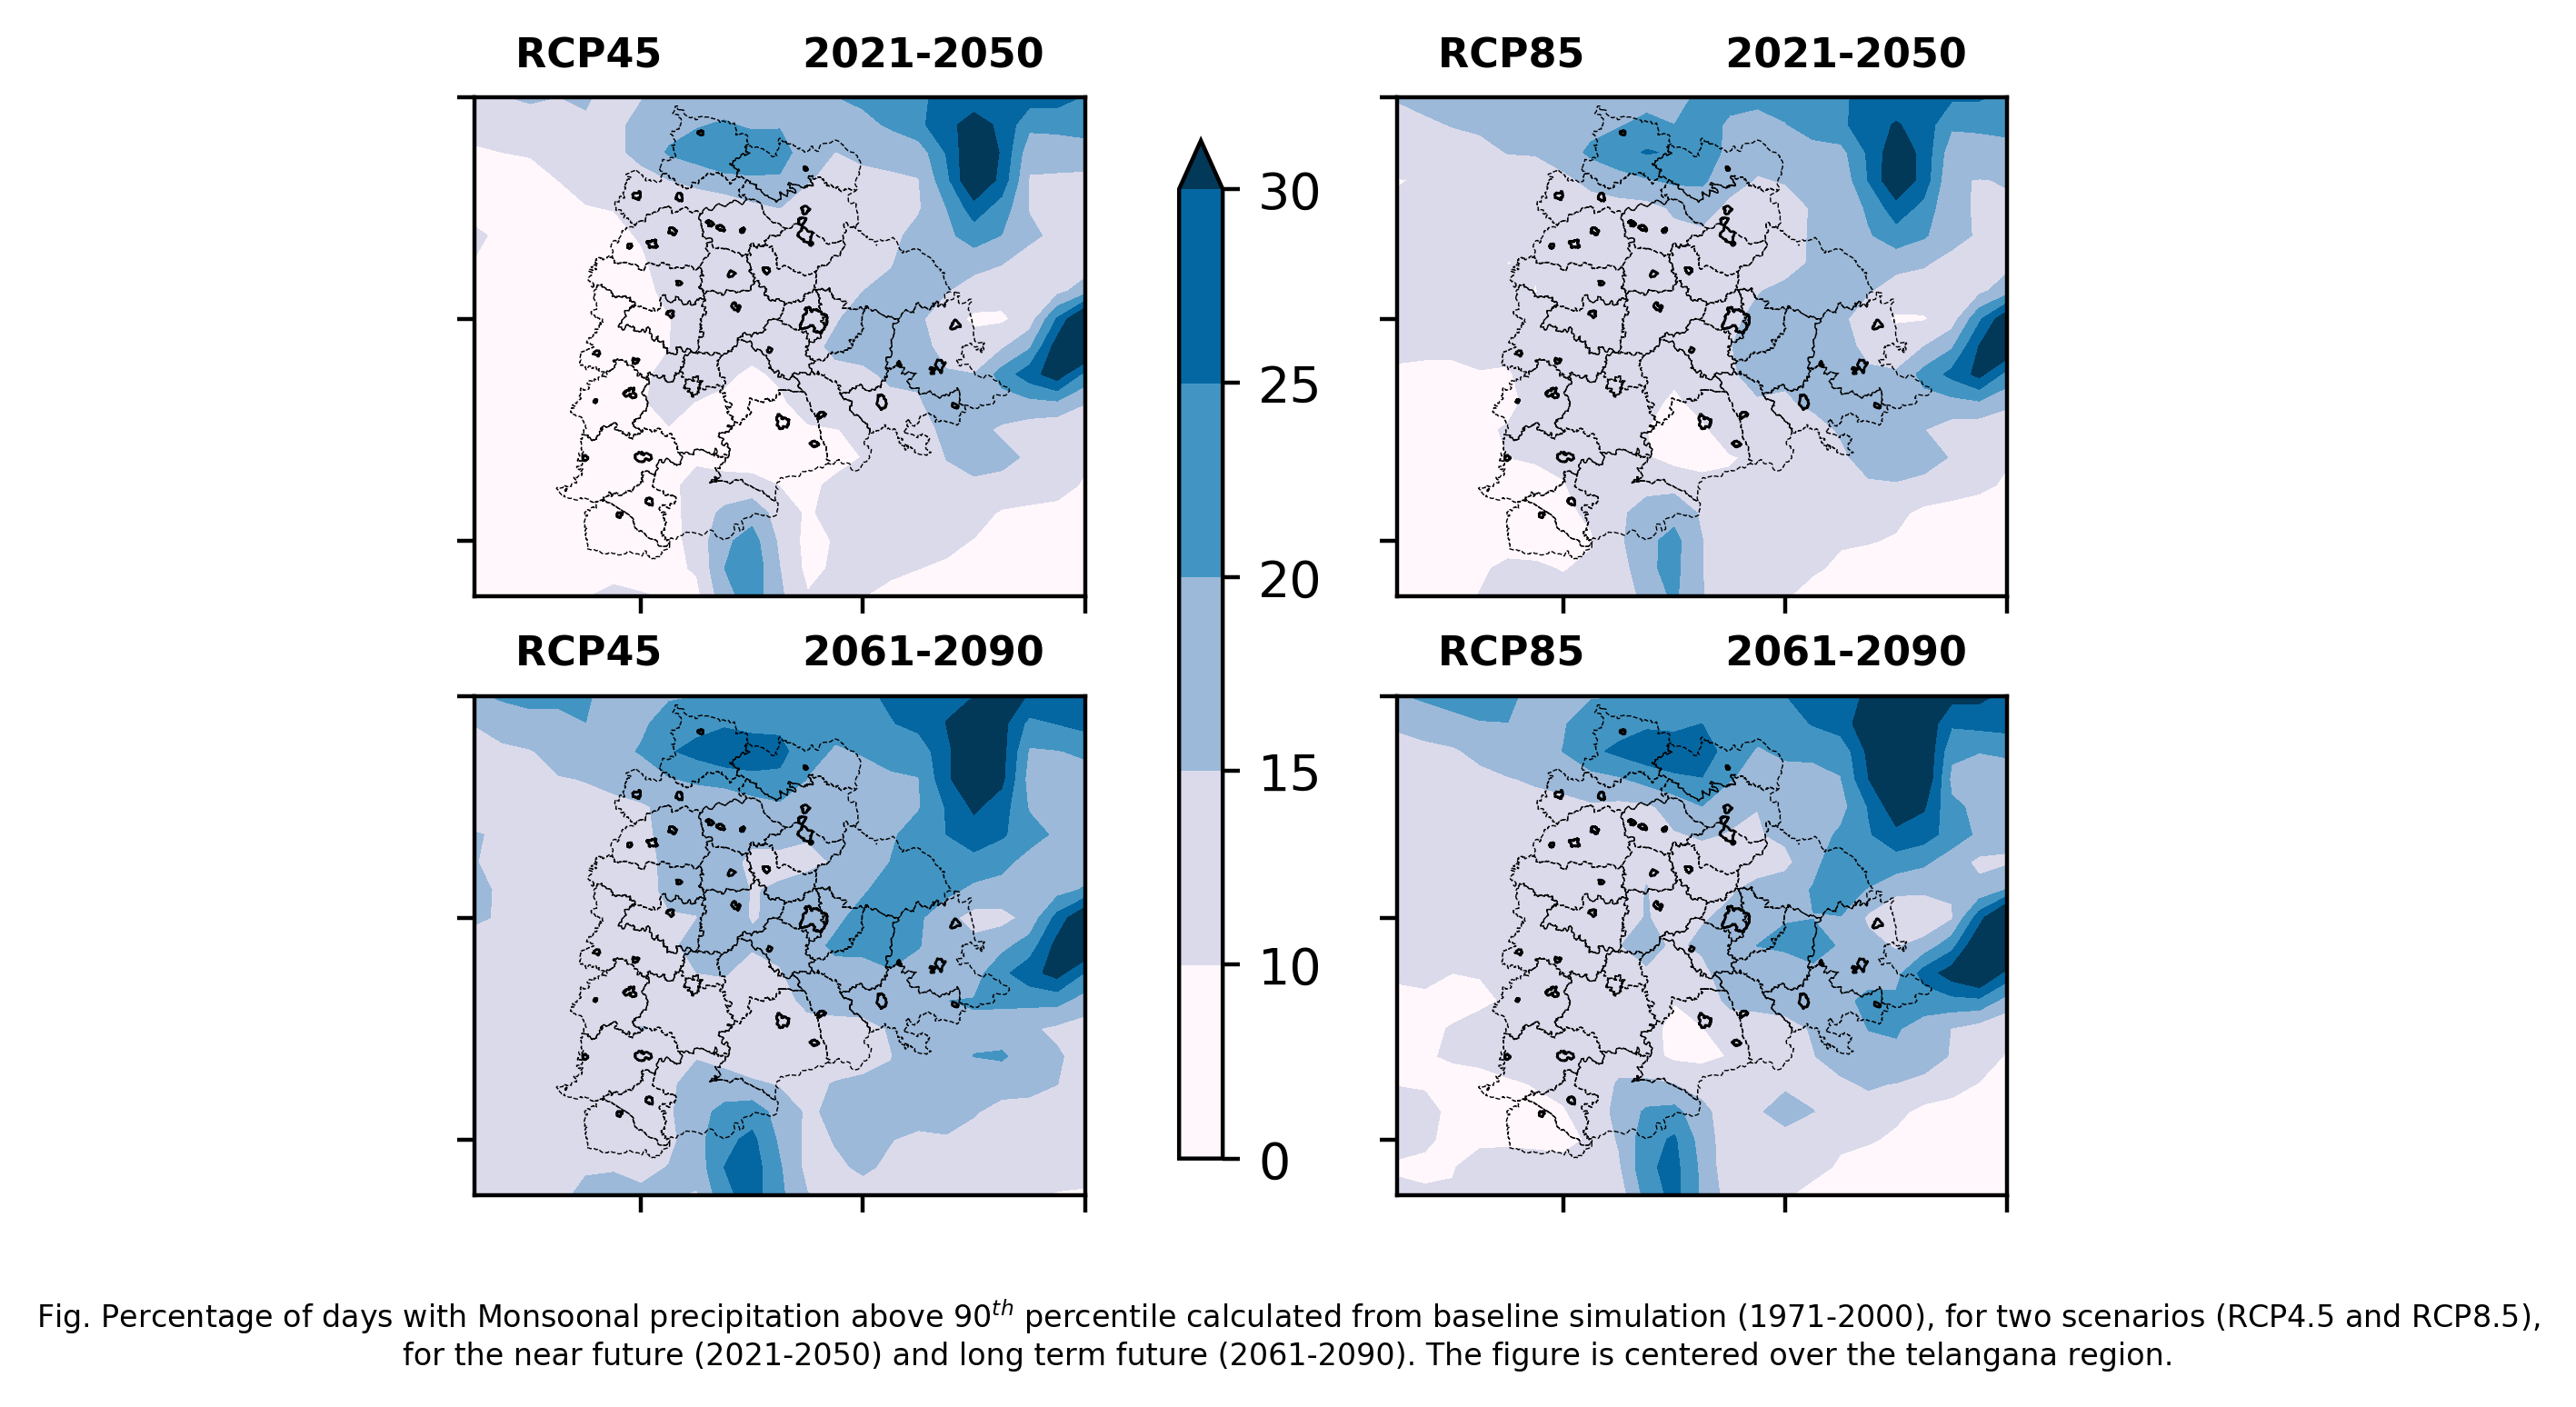

In [582]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()
type_plot = 'perc'
seas = 'JJAS'
thresh = 90

if thresh is 90:
    levels = [0, 10] + list(range(15, 35, 5))
    
elif thresh is 95:
    levels = [0, 5] + list(range(10, 30, 5))
    
    
plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(precip_change_percdays[scen][tslice][thresh][seas]).mean(["bnds", "time"])
    plot = ds['pr'].plot.contourf(ax=ax,
                                     levels=levels,
                                     cmap='PuBu')
    telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.25, linestyle="--", ax=ax)
    shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

caption = "Fig. Percentage of days with Monsoonal precipitation above "+str(thresh)+"$^{th}$"+\
          " percentile calculated from baseline simulation (1971-2000),"+\
          " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
          " and long term future (2061-2090). The figure is centered over the telangana region."
    

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

savename = f'CORDEX_precip{thresh}p_{seas}.png'
fig.savefig(f"../plots/{savename}", dpi=400, bbox_inches="tight")

#### change_ ecacsu days 40, 3

In [583]:
seas = 'MAMJ'
scen = 'RCP45'

fut_file1 = f"-selseas,{seas} -selvar,tasmax {merged['RCP45']['2061-2090']}"
fut_file2 = f"-selseas,{seas} -selvar,tasmax {merged['RCP85']['2061-2090']}"
base_file = f"-selseas,{seas} -selvar,tasmax {merged['HIST']}"


f1 = eca_csu(40, 3, fut_file1, base_file, percentage=False)


In [605]:
%%time
# change_ecacsudays = dict()

for scen in ["RCP45", "RCP85"]:
#     change_ecacsudays[scen] = dict()
    for tslice in ['2021-2050', '2061-2090']:
#         change_ecacsudays[scen][tslice] = dict()
        
        fut_file = f"-selvar,tasmax {merged[scen][tslice]}"
        base_file = f"-selvar,tasmax {merged['HIST']}"
        
        
        
        change_ecacsudays[scen][tslice]['Annual'] = eca_csu(40, 3, fut_file, base_file, percentage=False)
        
        

CPU times: user 168 ms, sys: 480 ms, total: 648 ms
Wall time: 2min 47s


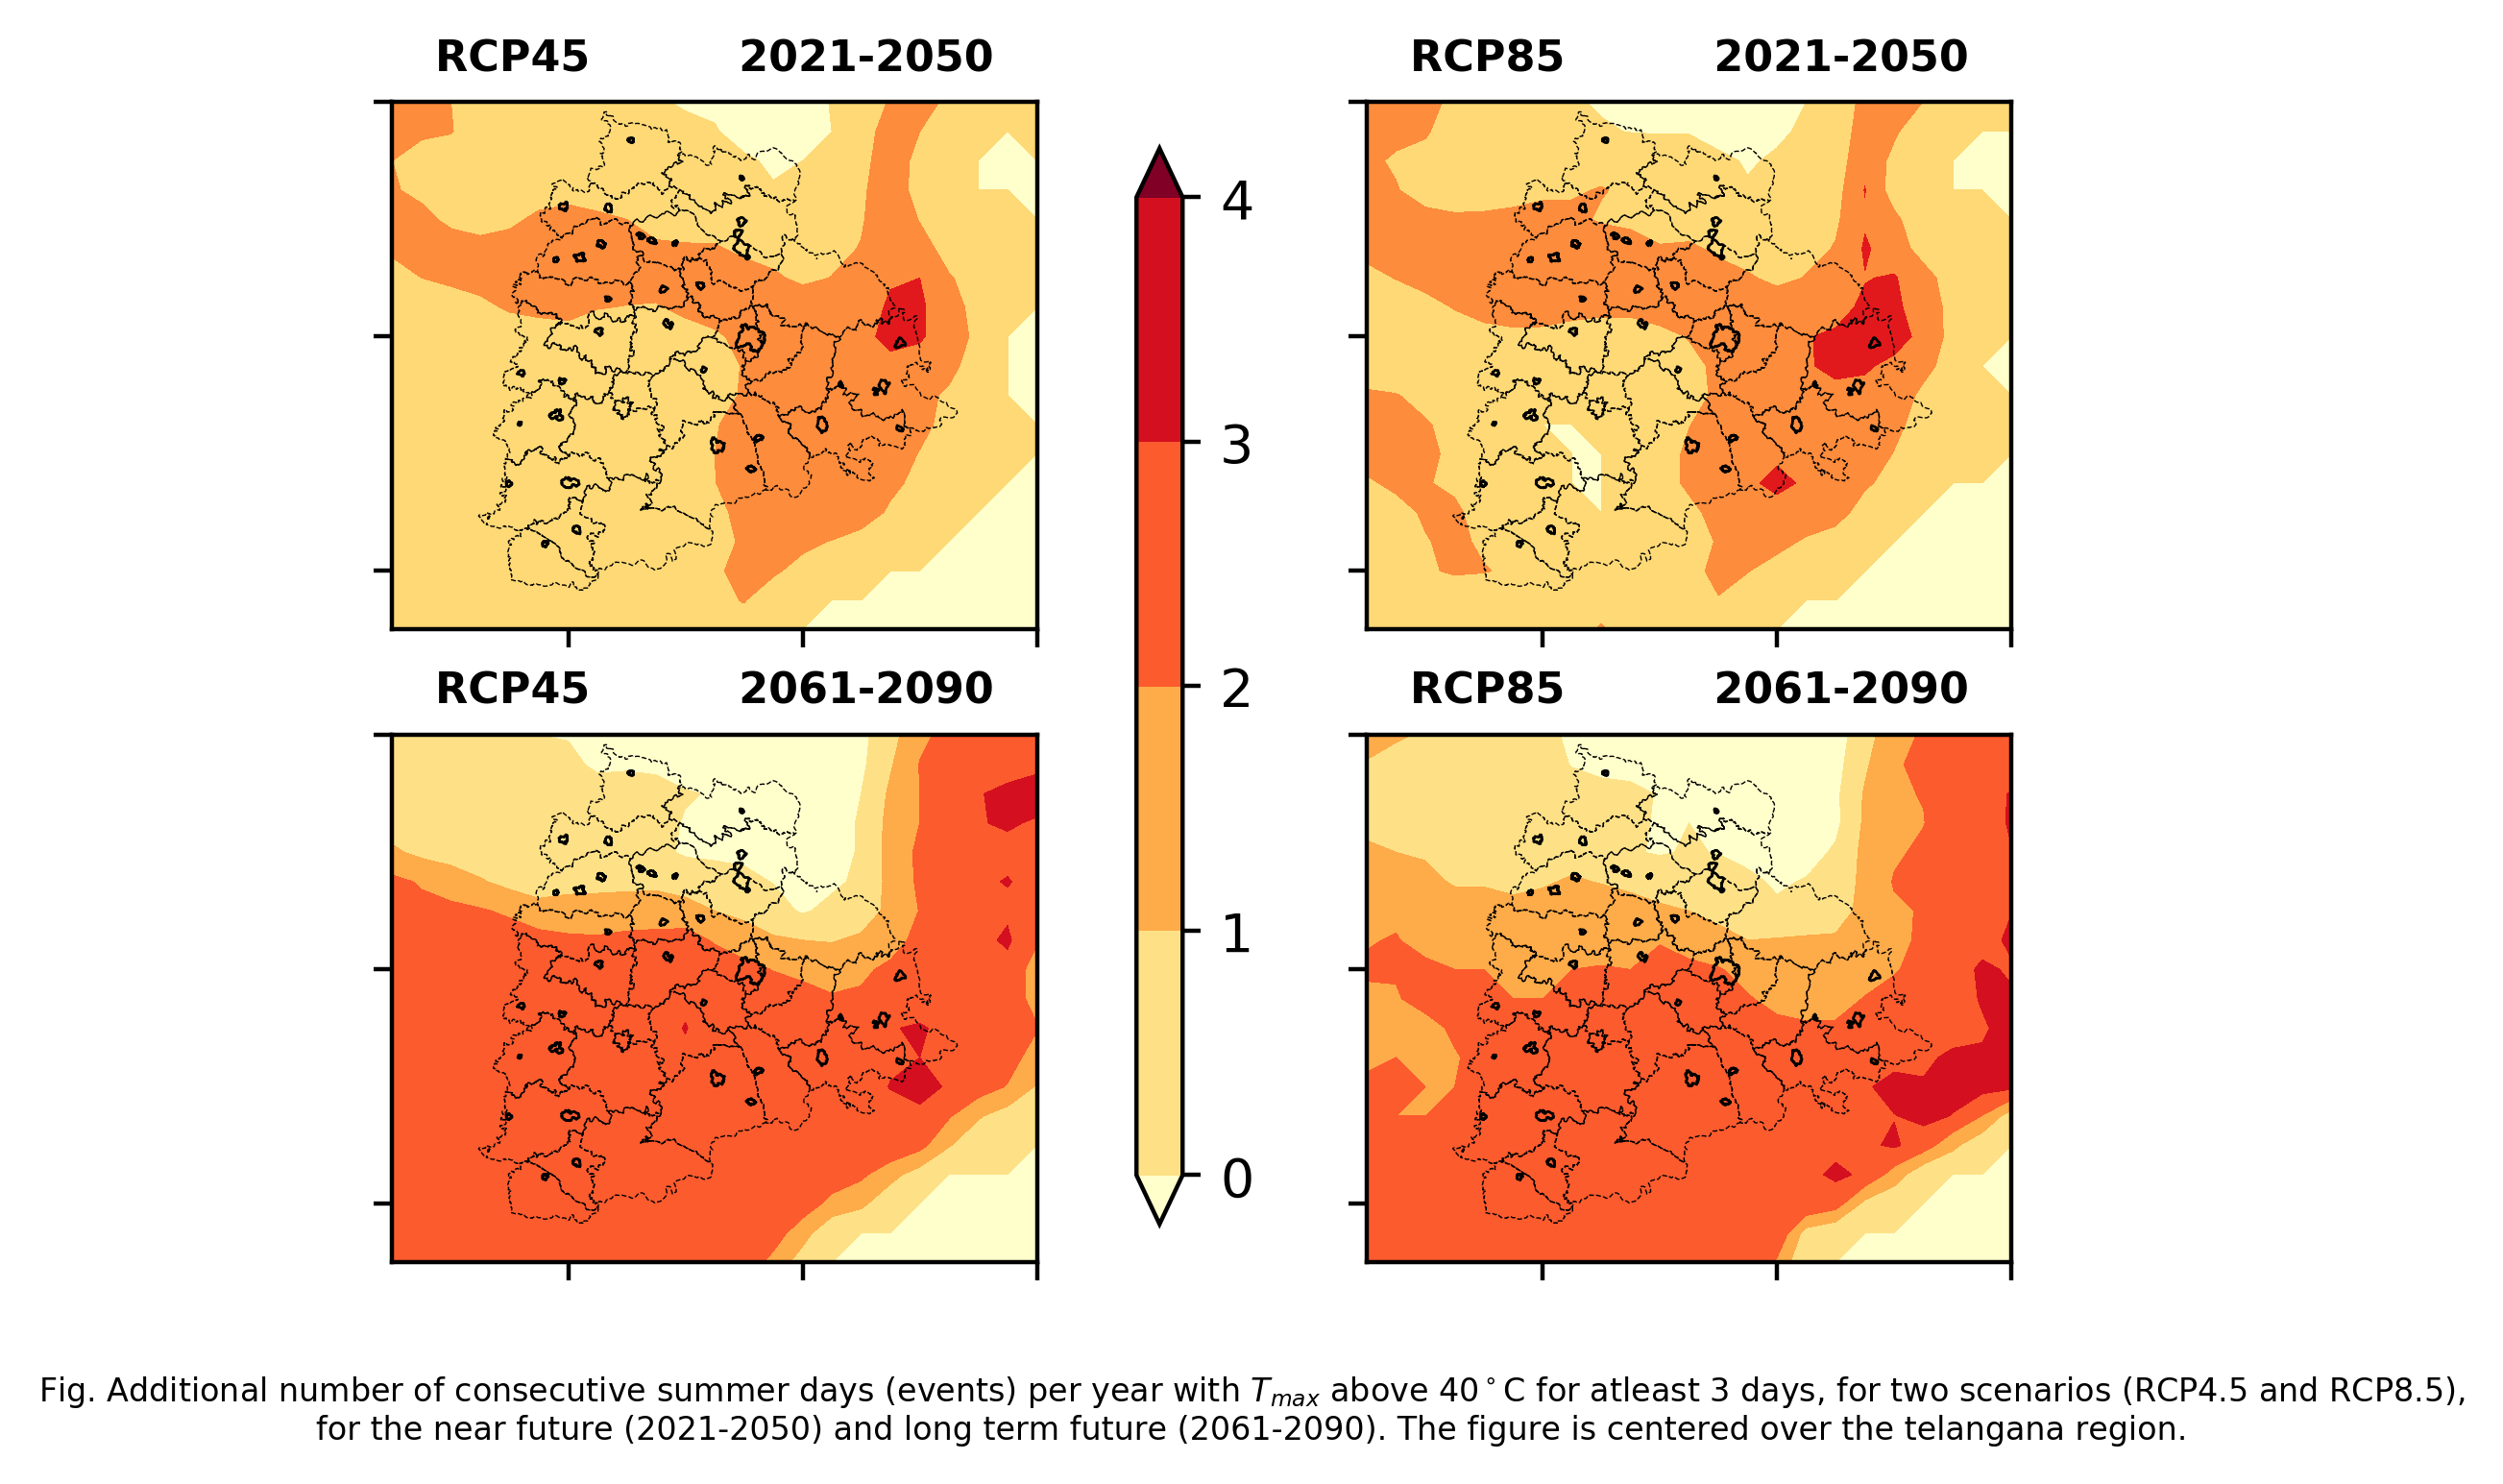

In [610]:
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()
type_plot = 'Additional'
seas = 'Annual'
thresh = 40

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]

perc = 90

i = 0 
for ax in axn_flat:
    tslice, scen = plot_order[i][0], plot_order[i][1].upper()
    ds = xr.open_dataset(change_ecacsudays[scen][tslice][seas]).mean('time')/30
    plot = ds['change_csu_40_3'].plot.contourf(ax=ax,
                                     levels=np.arange(0,5, 1),
                                     cmap="YlOrRd")
    telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.25, linestyle="--", ax=ax)
    shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
    ax.set_ylim(15.5, 20)
    ax.set_xlim(76.5, 82)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(scen.upper()+" "*10 +tslice,
                fontsize=8, fontweight='bold')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    
    plot.colorbar.remove()
    
    i += 1
    
cbar_ax = fig.add_axes([0.45, 0.15, 0.02, 0.7])

fig.colorbar(plot, cax=cbar_ax, extend='both')

if type_plot is 'Additional':
    caption = f"Fig. Additional number of consecutive summer days (events) per year "+\
               "with $T_{max}$ above "+str(thresh)+"$^\circ$C for atleast 3 days,"+\
               " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
               " and long term future (2061-2090). The figure is centered over the telangana region."
else:    
    caption = "Fig. Percentage of days with $T_{max}$ above "+str(perc)+"$^{th}$"+\
              " percentile calculated from baseline simulation (1971-2000)."+\
              " for two scenarios (RCP4.5 and RCP8.5),\nfor the near future (2021-2050)"+\
              " and long term future (2061-2090). The figure is centered over the telangana region."
    

fig.text(0.5, 0.03,
         caption,
         size=6, ha='center', va='center')

savename = f'CORDEX_ecacsu40_3days_{seas}.png'
fig.savefig(f"../plots/{savename}", dpi=400, bbox_inches="tight")

#### % change in precipitation

In [616]:
merged_precip = {'rcp45': '/tmp/rcp45.nc', 'rcp85': '/tmp/rcp85.nc'}
hist_precip = '/home/abhi/Documents/data/CORDEX/Ensemble_mean/CORDEX_ENSEM_HIST.nc'

In [646]:
!ncview {merged_precip['rcp45']}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for pr...
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 2448 requests (2443 known processed) with 0 events remaining.


In [672]:
%%time
change_precip = dict()

for scen in ['RCP45', 'RCP85']:
    
    hist_ymon = cdo.ymonmean(input=f'-selvar,pr {hist_precip}', returnCDF=True)
    
    cmd = f'-div -sub -monmean {merged_precip[scen.lower()]} {hist_ymon} {hist_ymon}'
    
    precip_change_file = cdo.mulc('100',
                             input=cmd,
                             returnCDF=True)
    
    change_precip[scen] = dict()
    for tslice in ['2021-2050', '2061-2090']:
        
        t1, t2 = tslice.split('-')
            
        change_precip[scen][tslice] = dict()
        for seas in ['Annual', 'JJAS', 'ON', 'DJF', 'MAM']:
            
            if seas == 'Annual':
                cmd = f'-selyear,{t1}/{t2} {precip_change_file}'
            else:
                cmd = f'-selseas,{seas} -selyear,{t1}/{t2} {precip_change_file}'
    
                
                
            change_precip[scen][tslice][seas] = cdo.timmean(input=cmd, returnCDF=True)
            
            
            
            
            

CPU times: user 92 ms, sys: 2.31 s, total: 2.4 s
Wall time: 49.3 s


In [673]:
!ncview {change_precip['RCP45']['2021-2050']['JJAS']}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for pr.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 1328 requests (1328 known processed) with 0 events remaining.


In [697]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [775]:
cmap = matplotlib.cm.RdBu
cmap_shifted = shiftedColorMap(cmap, start=l, midpoint=m, stop=1)

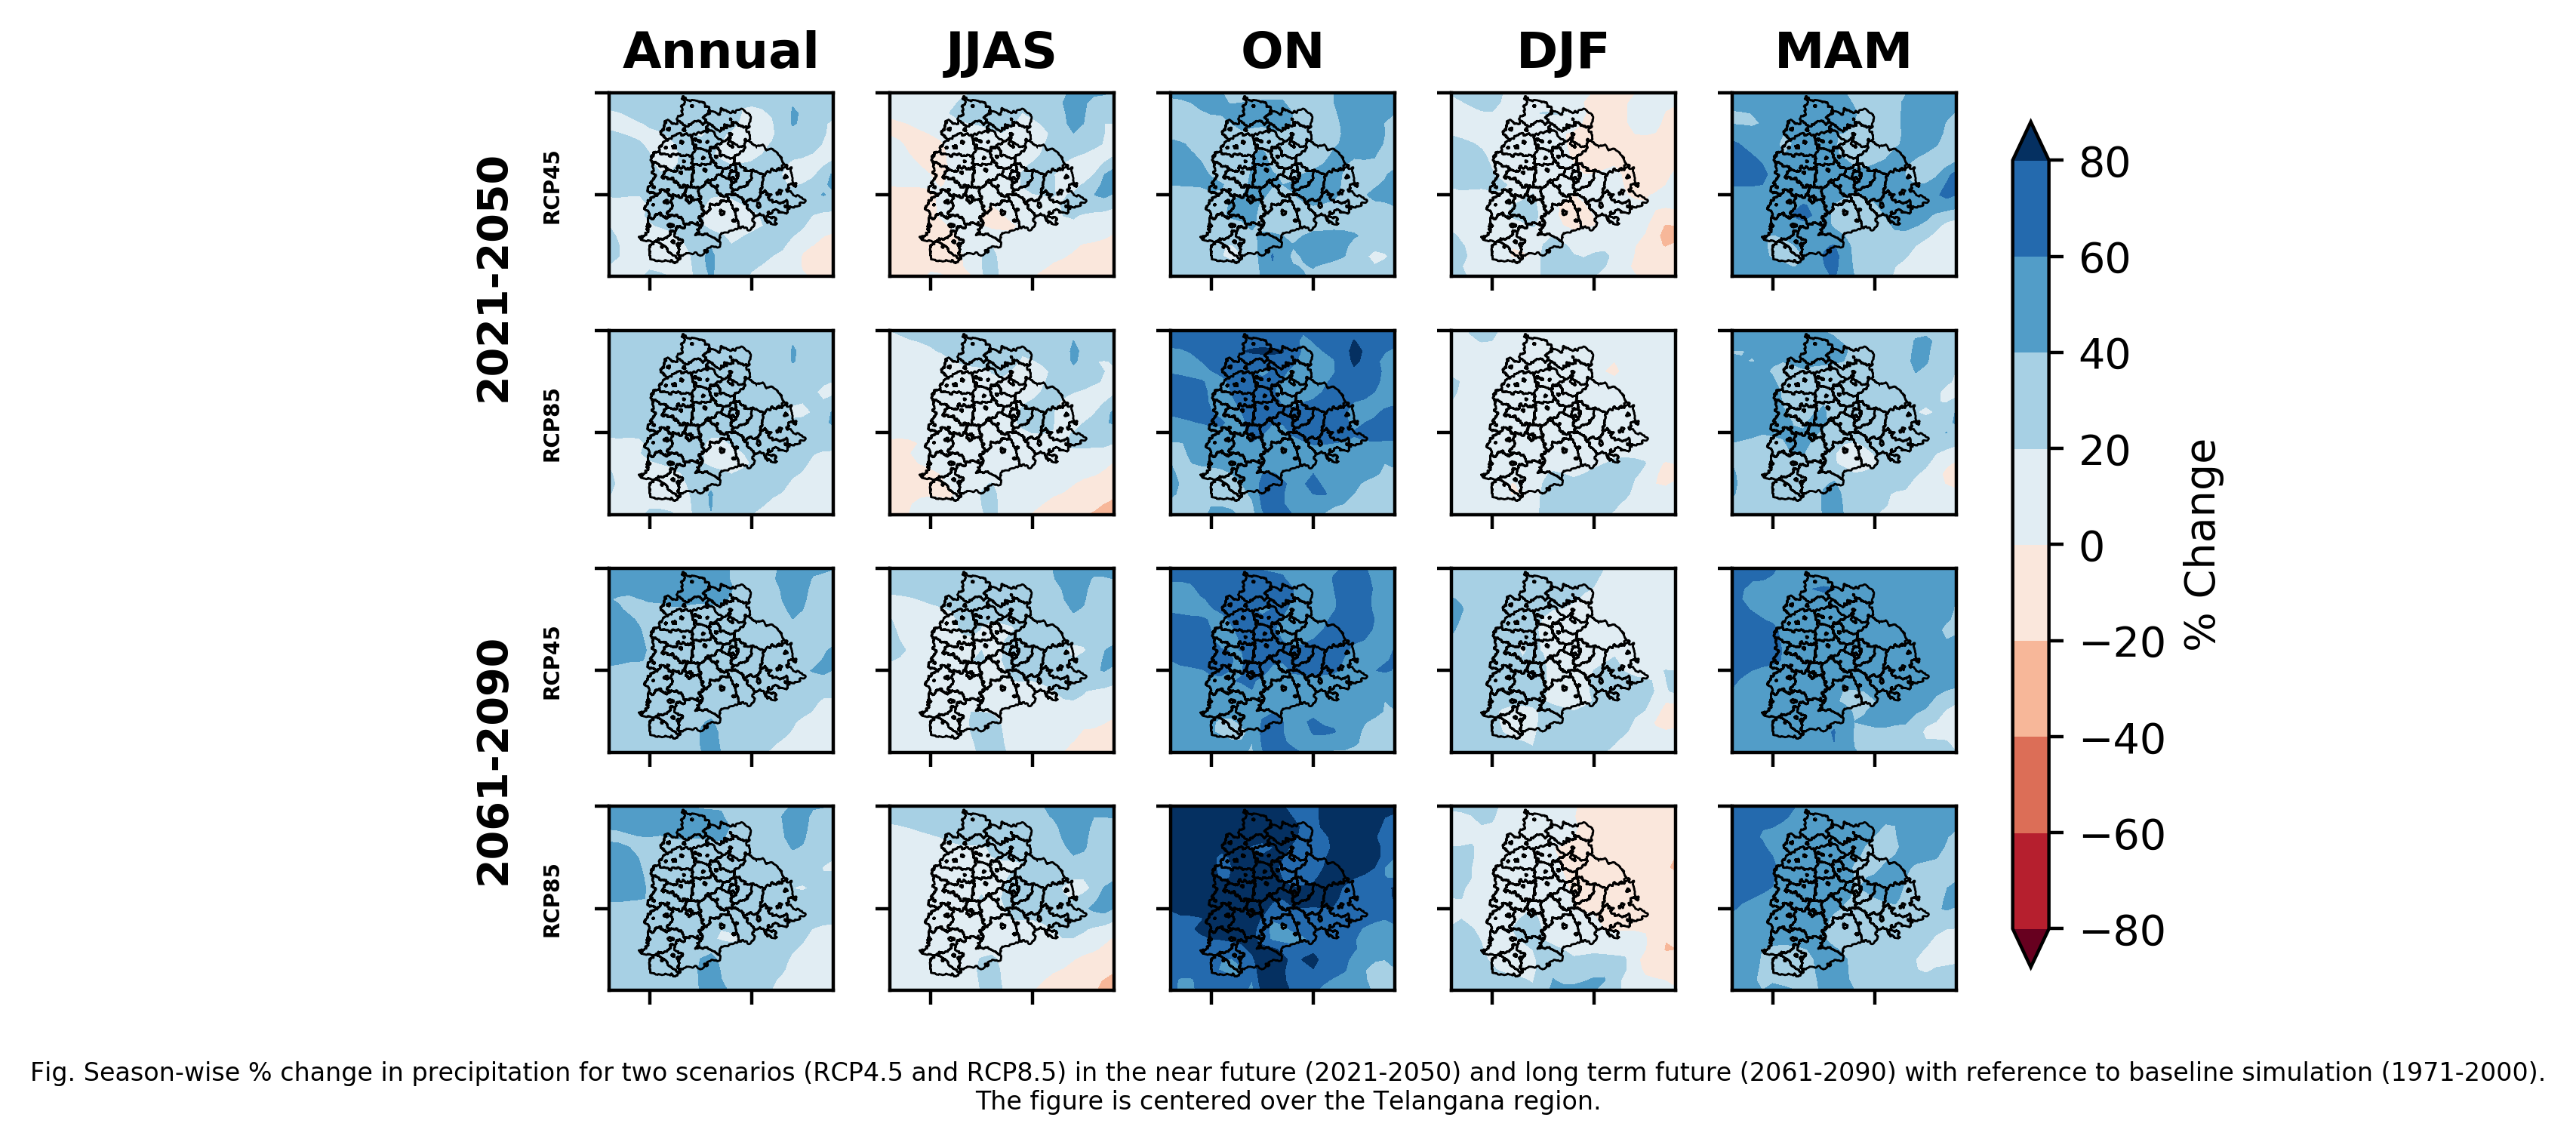

In [722]:
perc = 90
fig, axn = plt.subplots(4, 5, sharex=True, sharey=True, dpi=400)

axn_flat = axn.flatten()

plot_order = [('2021-2050', 'rcp45'),
              ('2021-2050', 'rcp85'),
              ('2061-2090', 'rcp45'),
              ('2061-2090', 'rcp85')]
              

for seas in [ 'Annual', 'JJAS', 'ON', 'DJF', 'MAM']:
    
    if seas is 'Annual':
        axn_pos = [0, 5, 10, 15]
    elif seas is 'JJAS':
        axn_pos = [1, 6, 11, 16]
    elif seas is 'ON':
        axn_pos = [2, 7, 12, 17]
    elif seas is 'DJF':
        axn_pos = [3, 8, 13, 18]
    elif seas is 'MAM':
        axn_pos = [4, 9, 14, 19]
        
    
    i = 0
    for pos in axn_pos:
        
        ax = axn_flat[pos]
        
        tslice = plot_order[i][0]
        scen = plot_order[i][1]
        
     
        ds = (xr.open_dataset(change_precip[scen.upper()][tslice][seas])
              .mean(['time', "bnds"])).drop("time_bnds")

        plot = (ds['pr']
                 .plot.contourf(ax=ax,
                                levels=np.arange(-80, 100, 20),
                               cmap='RdBu',extend='both'))

        save_name = f"CORDEX_perc{perc}_Telangana.pdf"
        
            
        telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
        shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)


        
        plot.colorbar.remove()
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        ax.set_xticklabels([''])
        ax.set_yticklabels([''])
        
        ax.set_ylim(15.5, 20)
        ax.set_xlim(76.5, 82)

        
#         ax.set_xticks(range(60, 110, 10))
#         ax.set_yticks(range(10, 50, 10))
        
        if pos <= 4:
            ax.set_title(seas, fontweight='bold')
            
        if seas is 'Annual':
            ax.set_ylabel(scen.upper(), fontweight='bold', size=5)
        
        i += 1
        
        

fig.text(0.05, 0.8, "2021-2050", rotation=90, fontweight='bold')
fig.text(0.05, 0.4, "2061-2090", rotation=90, fontweight='bold')


fig.text(0.5, 0.05,
         f"Fig. Season-wise % change in "+\
         "precipitation for "+\
         "two scenarios (RCP4.5 and RCP8.5) "+\
         "in the near future (2021-2050) "+\
         "and long term future (2061-2090) with reference to baseline simulation (1971-2000).\n"+\
         "The figure is centered over the Telangana region.",
         size=6, ha='center', va='center')


cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])

cbar = fig.colorbar(plot, cax=cbar_ax, extend='both')
cbar_ax.set_ylabel("% Change")

# cbar.set_ticks([-50, -30, -20, -10, -5, 0,  5, 10, 20, 30, 50])
fig.subplots_adjust(wspace=0)
# fig.savefig(f"../output/plots/{save_name}", 
#             bbox_inches="tight", dpi=400)

In [752]:
val_range = np.arange(-100, 110, 10)
spacing = 1/20
cmap_points = np.arange(0, 1+spacing, spacing, dtype=np.float)

In [772]:
f = np.where(val_range == -30)[0][0]
l = np.where(val_range == 100)[0][0]
m = np.where(val_range == 0)[0][0]

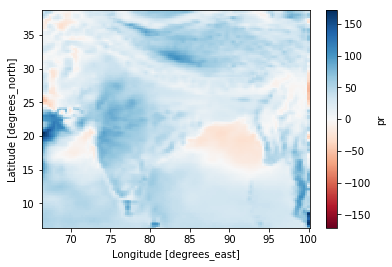

In [778]:
ds.pr.plot(cmap=cmap)

In [771]:
cmap_points[f:(l+1)]

array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85,
       0.9 , 0.95, 1.  ])

In [749]:
cmap_points[val_range]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [719]:
orig_cmap = matplotlib.cm.RdBu
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.2, name='shifted')
shrunk_cmap = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.5, stop=0.8, name='shrunk')

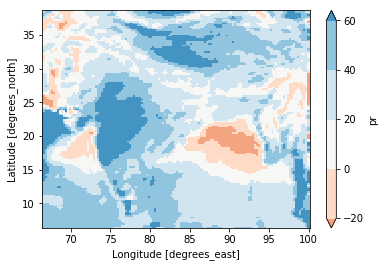

In [720]:
ds.pr.plot(cmap=shrunk_cmap,
          levels=np.arange(-20, 80, 20))

In [807]:
out_dir = '/media/abhi/5C0A-E153/test_files'

In [ ]:
from 

In [810]:
file_name = lambda metric, scen, tslice, seas: f'ECA_{metric}_{scen}_{tslice}S_{seas}'

In [791]:
!cdo showname {file_name('CWD', 'RCP45', '2030', 'ANN')}

 consecutive_wet_days_index_per_time_period number_of_cwd_periods_with_more_than_5days_per_time_period
cdo showname: Processed 2 variables [0.01s 17MB]


In [811]:
file_name('CWD', 'RCP45', '2030', 'ANN')

'ECA_CWD_RCP45_2030S_ANN'

In [816]:
from pathlib import Path

In [828]:
%%time
for metric in ['CDD', 'CWD']:
    for scen in ['RCP45', 'RCP85']:
        for tslice in ['2030', '2070']:
            for seas in ['ANN', 'JJAS', 'ON', 'DJF', 'MAM']:
                
                file_dir = f'/media/abhi/My Passport/CORDEX/PR/HIST/{metric}'
                f = file_name(metric, scen, tslice, seas)
                
                var = f'number_of_{metric.lower()}_periods_with_more_than_5days_per_time_period'
                cmd = 'gdal_translate -ot float32 -unscale -CO COMPRESS=deflate -a_srs '+\
                      '"+proj=longlat +ellps=WGS84" '+\
                     f'NETCDF:"{file_dir}/{f}.nc":{var} {out_dir}/{f}.tiff'
                
                os.system(cmd)
                

CPU times: user 16 ms, sys: 3.44 s, total: 3.45 s
Wall time: 11.6 s


#### Make a CWD_CDD dataset

In [1098]:
metricIndex = pd.Index(['CDD', 'CWD'], name='metric')
def gettslice(tslice):
    if tslice == '2021-2050':
        return '2030'
    elif tslice == '2061-2090':
        return '2070'
    

In [1103]:
def get_metric_file_ds(metric, scen, tslice, seas):
    file_dir = f"/media/abhi/My Passport/CORDEX/PR/HIST/{metric}"
    f = file_name(metric, scen, gettslice(tslice), seas)

    var = f'number_of_{metric.lower()}_periods_with_more_than_5days_per_time_period'
    
    return xr.open_dataset(f"{file_dir}/{f}.nc").rename({var: 'var_name'})['var_name'].mean(dim='time')

In [1106]:
new_seasIndex = pd.Index(['ANN', 'JJAS', 'ON', 'DJF', 'MAM'], name='seas')


In [1111]:
%%time
cdd_cwd_ds = xr.concat(
    [xr.concat(
        [xr.concat(
            [xr.concat([get_metric_file_ds(metric, scen, tslice, seas) 
                        for seas in new_seasIndex], dim = seasIndex)
             for tslice in tsliceIndex], dim=tsliceIndex)
         for scen in scenIndex], dim=scenIndex)
     for metric in metricIndex], dim=metricIndex).to_dataset()

CPU times: user 340 ms, sys: 0 ns, total: 340 ms
Wall time: 347 ms


In [1114]:
ULB_cdd_cwd_ds = subsetbygdf(cdd_cwd_ds, shp, 'MUN_NAME')

In [1120]:
ULB_cdd_cwd_df = ULB_cdd_cwd_ds.to_dataframe().reset_index().rename({'var_name': 'value'}, axis=1)
ULB_cdd_cwd_df.to_csv("../data/ULB_cdd_cwd_change.csv")

In [1105]:
seasIndex = pd.Index(['Annual', 'JJAS', 'ON', 'DJF', 'MAM'], name='seas')
tsliceIndex = pd.Index(['2021-2050', '2061-2090'], name='tslice')
scenIndex = pd.Index(['RCP45', 'RCP85'], name='scen')
varIndex = pd.Index(['precip', 'tmean', 'tmax', 'tmin'], name='var')

In [1023]:
def get_ds(scen, tslice, seas, var):
    varname_dict = {'precip': 'pr',
                   'tmean': 'tas',
                   'tmax': 'tasmax',
                   'tmin': 'tasmin'}
    
    if var == 'precip':
        ds = change_precip
    else:
        ds = change_new
        
    return (xr.open_dataset(ds[scen][tslice][seas])
                 .mean(['bnds', 'time'])
                 .rename({varname_dict[var]: 'var_name'}))['var_name']
    
        

In [845]:
get_ds('RCP45', '2021-2050', 'Annual', 'tmax')

<xarray.DataArray 'var_name' (lat: 129, lon: 135)>
array([[1.01292 , 1.011884, 1.010983, ..., 1.045811, 1.068483, 1.114867],
       [1.014992, 1.01379 , 1.012626, ..., 1.048868, 1.09068 , 1.121918],
       [1.017069, 1.015577, 1.014043, ..., 1.050242, 1.110289, 1.11955 ],
       ...,
       [1.702497, 1.690779, 1.681966, ..., 1.448377, 1.446454, 1.634047],
       [1.741619, 1.723783, 1.703396, ..., 1.50808 , 1.519067, 1.623878],
       [1.78907 , 1.75899 , 1.717737, ..., 1.585153, 1.62021 , 1.608572]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5

In [1024]:
%%time
change_ds = xr.concat([
    xr.concat(
        [xr.concat(
            [xr.concat([get_ds(scen, tslice, seas, var) 
                       for seas in seasIndex], dim=seasIndex)
             for tslice in tsliceIndex], dim=tsliceIndex)
            for scen in scenIndex], dim=scenIndex)
    for var in varIndex], dim=varIndex).to_dataset()

CPU times: user 792 ms, sys: 4 ms, total: 796 ms
Wall time: 1.06 s


In [1025]:
def subsetbygdf(ds, gdf, region_col, apply_fldmean=True):
    
    regionIndex = gdf[region_col]
    regionIndex.name = 'region'
    if apply_fldmean:
        return xr.concat([fldmean(ds.salem.roi(shape=gdf.loc[gdf.index == index], 
                                              all_touched=True))
                         for index in gdf.index],
                        dim=regionIndex)
    
    else: 
        pass

In [1026]:
%%time
ULB_change_ds = subsetbygdf(change_ds, shp, 'MUN_NAME')

CPU times: user 1.11 s, sys: 20 ms, total: 1.13 s
Wall time: 1.85 s


In [1027]:
ULB_change_df = (ULB_change_ds.to_dataframe().reset_index()
                 .rename({'var_name': 'value',
                         'region': 'MUN_NAME'}, axis=1))

In [1028]:
ULB_change_df.to_csv("../data/ULB_change.csv", index=False)

In [1034]:
ULB_change_gdf = pd.concat([shp.set_index('MUN_NAME'),
                      ULB_change_df.set_index('MUN_NAME')], axis=1, join='inner').reset_index()

In [1036]:
ULB_change_gdf.to_file("../data/Municipal_Boundaries_change.shp")

In [1040]:
ULB_change_gdf['var']

MUN_NAME  OBJECTID_1    SHAPE_Leng    MUNBND_ID  OBJECTID  Shape_Le_1  \
0      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
1      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
2      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
3      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
4      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
5      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
6      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
7      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
8      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
9      ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
10     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
11     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
12     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
13     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
14     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
15     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
16     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
17     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
18     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
19     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
20     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
21     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
22     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
23     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
24     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
25     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
26     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
27     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
28     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
29     ARMOOR           1  35129.979944  MUNBND_1126         0    0.325253   
...       ...         ...           ...          ...       ...         ...   
2930   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2931   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2932   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2933   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2934   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2935   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2936   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2937   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2938   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2939   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2940   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2941   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2942   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2943   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2944   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2945   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2946   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2947   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2948   BODHAN          37  18936.189699  MUNBND_1044         0    0.174680   
2949   BODHAN          37  

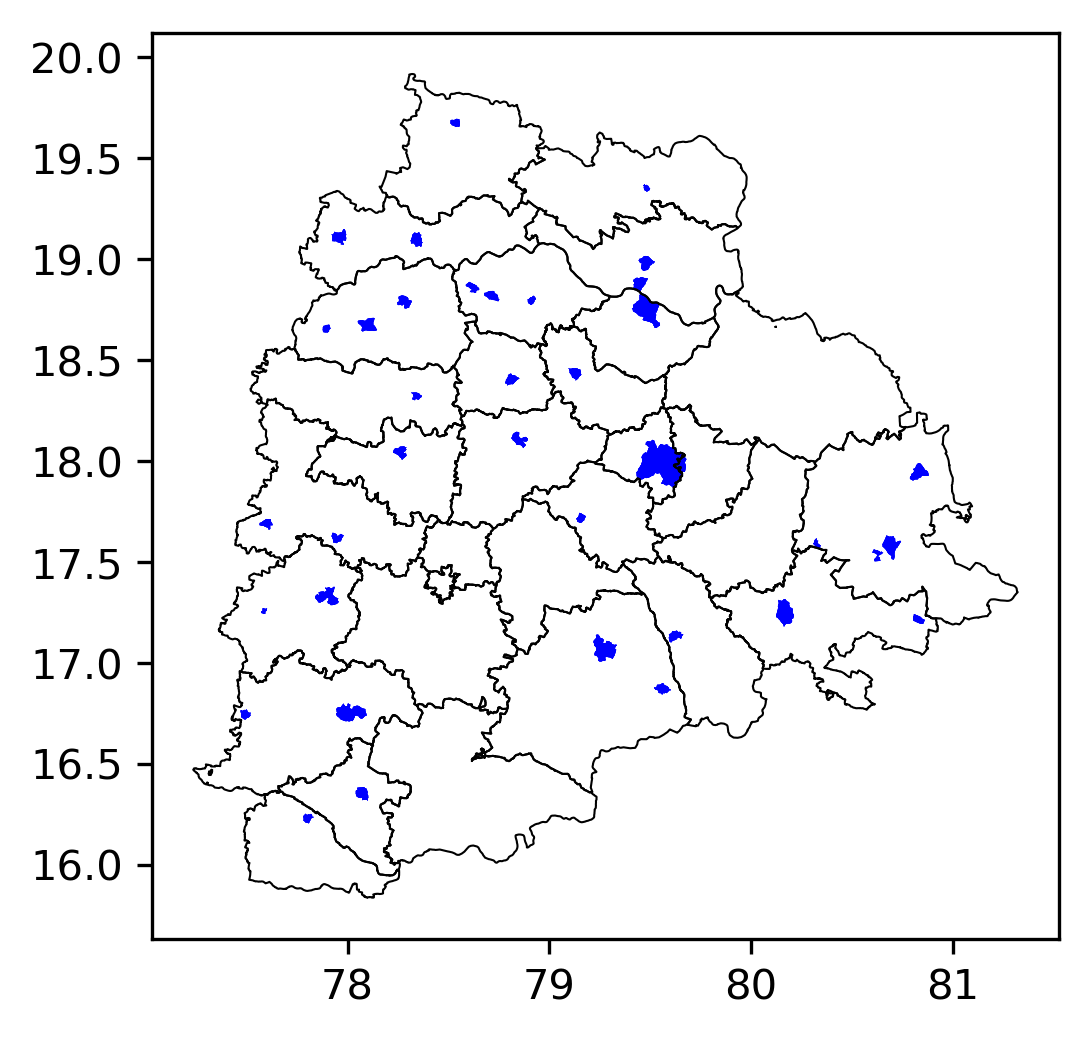

In [1051]:
fig, ax = plt.subplots(dpi=300)

is_precip = ULB_change_gdf['var'] == 'precip'
gt0 = ULB_change_gdf['value'] > 0
lt0 = ULB_change_gdf['value'] < 0
is_seas = lambda seas: ULB_change_gdf['seas'] == seas

telangana2.geometry.boundary.plot(color=None, 
                                  edgecolor='k', 
                                  linewidth=0.5, ax=ax)

(ULB_change_gdf.loc[is_precip & gt0 & is_seas('MAM')]
 .plot(ax=ax, color='blue', label='Increasing'))
(ULB_change_gdf.loc[is_precip & lt0 & is_seas('MAM')]
 .plot(ax=ax, color='red', label='Decreasing'))

#### Rectify temperature change analysis due to inconsistency in timesteps

In [900]:
path_to_files = '/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MEAN/2021-2050'
path_main = '/home/abhi/Documents/data/CORDEX/TEMP/'
file_details = path_to_files.replace(path_main, "").split('/')
scen, var, tslice = file_details
files = !ls {path_to_files}

In [903]:
files

['tas_WAS-44_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc',
 'tas_WAS-44_ICHEC-EC-EARTH_rcp45_r12i1p1_SMHI-RCA4_2021-2050.nc',
 'tas_WAS-44_IPSL-IPSL-CM5A-MR_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc',
 'tas_WAS-44_MIROC-MIROC5_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_MPI-CSC-REMO2009_2021-2050.nc',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc',
 'tas_WAS-44_NOAA-GFDL-GFDL-ESM2M_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc']

In [918]:
def showtsteps(path_to_files):
    path_main = '/home/abhi/Documents/data/CORDEX/TEMP/'
    file_details = path_to_files.replace(path_main, "").split('/')
    scen, var, tslice = file_details
    files = !ls {path_to_files}/*.nc
    
    for file in files:
        print(cdo.ndate(input=file))
        
        

In [ ]:
def getCommonModels(path1, path2):
    files1 = !ls {path1}/*.nc
    files2 = !ls {path2}/*.nc
    

In [ ]:
def get_drivingGCM_RCM(fname):
    

In [939]:
showtsteps('/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MAX/2061-2090')

['8958']
['10740']
['10740']
['8958']
['10740']
['10740']
['10740']
['8952']
['8952']
['10748']
['8958']
['8952']


In [1003]:
from pathlib import Path

In [1006]:
p = Path('/home/abhi/Documents/mygit/CORDEX_EnsMean/output_ymonmean/TEMP_HIST_MEAN.nc')
p.exists()

True

In [1007]:
def EnsMeanNew(files, folders, overwrite=False):
    gridfile = "/home/abhi/Documents/mygit/CORDEX_EnsMean/data/gridfile.txt"
    outfile_name = "_".join(folders)
    
    if "HIST" in folders:
        cmd = " ".join(list(map(lambda file: f"-remapbil,{gridfile} -ymonmean"+\
                                   f" -vertmean -selyear,1971/2000 {file}", files)))
        
    else:
        tslice_string = "/".join(folders[-1].split("-"))
        cmd = " ".join(list(map(lambda file: f"-remapbil,{gridfile} -ymonmean"+\
                           f" -vertmean -selyear,{tslice_string} {file}", files)))
    
    outfile = f"/home/abhi/Documents/mygit/CORDEX_EnsMean/output_ymonmean/{outfile_name}.nc"
    
    if not Path(outfile).exists():
        return cdo.ensmean(input=cmd, output=outfile)
    else:
        return None

In [991]:
path = '/home/abhi/Documents/data/CORDEX/TEMP/HIST/MEAN/2061-2090'
files = !ls {path}/*
folders = ['TEMP', 'RCP45', 'MEAN', '2061-2090']

In [ ]:
EnsMeanNew()

In [1015]:
%%time
for var in ['MEAN', 'MAX', 'MIN']:
    for scen in ['RCP45', 'RCP85']:
        if scen != 'HIST':
            for tslice in ['2021-2050']:
                folders = ['TEMP', scen, var, tslice]
                path = f'/home/abhi/Documents/data/CORDEX/TEMP/{scen}/{var}/{tslice}'
        else:
            folders = ['TEMP', scen, var]
            path = f'/home/abhi/Documents/data/CORDEX/TEMP/{scen}/{var}'
            
        files = glob.glob(f'{path}/*.nc')
        
        EnsMeanNew(files, folders, overwrite=False)
        


CPU times: user 344 ms, sys: 632 ms, total: 976 ms
Wall time: 6min 13s


In [1000]:
path

'/home/abhi/Documents/data/CORDEX/TEMP/HISTRCP45/MEAN/2061-2090'

In [994]:
%%time 
EnsMeanNew(files, folders)

CPU times: user 44 ms, sys: 192 ms, total: 236 ms
Wall time: 44.8 s


'/home/abhi/Documents/mygit/CORDEX_EnsMean/output_ymonmean/TEMP_RCP45_MEAN_2061-2090.nc'

In [ ]:
EnsMeanNew()

In [937]:
cord1 = '/home/abhi/Documents/data/CORDEX/TEMP/HIST/MEAN/tas_WAS-44_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_SMHI-RCA4-1971-2000.nc'
cord2 = '/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MEAN/2061-2090/tas_WAS-44_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_SMHI-RCA4_2061-2090.nc'

In [943]:
path1 = '/home/abhi/Documents/data/CORDEX/TEMP/RCP45/MEAN/2061-2090'
path2 = '/home/abhi/Documents/data/CORDEX/TEMP/HIST/MEAN'


In [953]:
files1 = !ls {path1}
files2 = !ls {path2}

In [976]:
set1 = set(map(lambda x: x.replace('rcp45_', '').replace('_2061-2090.nc', ''), files1))
set2 = set(map(lambda x: (x.replace('historical_', '')
                           .replace('-1971-2000.nc', '')
                           .replace('_1971-2000.nc', '')),
                           files2))

In [987]:
files[0]

'tas_WAS-44_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_SMHI-RCA4_2021-2050.nc'

In [978]:
set2

{'tas_WAS-44_CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_ICHEC-EC-EARTH_r12i1p1_SMHI-RCA4',
 'tas_WAS-44_IPSL-IPSL-CM5A-MR_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_MIROC-MIROC5_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_NOAA-GFDL-GFDL-ESM2M_r1i1p1_SMHI-RCA4'}

In [985]:
set1.intersection(set2)

{'tas_WAS-44_CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_ICHEC-EC-EARTH_r12i1p1_SMHI-RCA4',
 'tas_WAS-44_IPSL-IPSL-CM5A-MR_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_MIROC-MIROC5_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009',
 'tas_WAS-44_MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4',
 'tas_WAS-44_NOAA-GFDL-GFDL-ESM2M_r1i1p1_SMHI-RCA4'}

#### merged ymonmean

In [ ]:
EnsMeanNew()

In [1012]:
!ls

TEMP_HIST_MAX.nc   TEMP_RCP45_MAX_2061-2090.nc	 TEMP_RCP85_MAX_2061-2090.nc
TEMP_HIST_MEAN.nc  TEMP_RCP45_MEAN_2061-2090.nc  TEMP_RCP85_MEAN_2061-2090.nc
TEMP_HIST_MIN.nc   TEMP_RCP45_MIN_2061-2090.nc	 TEMP_RCP85_MIN_2061-2090.nc


In [1016]:
%%time
hist_merged_ymon = cdo.merge(input=" ".join([f"TEMP_HIST_{var}.nc" 
                                        for var in ["MEAN", "MAX", "MIN"]]),
                       env={"SKIP_SAME_TIME": "1"},
                       returnCDF=True)

merged_ymon = dict()

merged_ymon["HIST"] = hist_merged_ymon

for scen in ["RCP45", "RCP85"]:
    merged_ymon[scen] = dict()
    for tslice in ["2021-2050", "2061-2090"]:
        merged_ymon[scen][tslice] = cdo.merge(input=" ".join([f"TEMP_{scen}_{var}_{tslice}.nc" 
                                                for var in ["MEAN", "MAX", "MIN"]]),
                                         env={"SKIP_SAME_TIME": "1"},
                                         returnCDF=True)

CPU times: user 20 ms, sys: 508 ms, total: 528 ms
Wall time: 1.43 s


In [1017]:
%%time
change_new = deepcopy(merged_ymon)
del change_new["HIST"]
for scen in ["RCP45", "RCP85"]:
    for tslice in ["2021-2050", "2061-2090"]:
        change_new[scen][tslice] = dict()
        for seas in ["Annual", "JJAS", "ON", "DJF", "MAM"]:
            
            if seas == "Annual":
                FILE_NAME_FUT = merged_ymon[scen][tslice]
                FILE_NAME_BASE = merged_ymon["HIST"]
            else:
                FILE_NAME_FUT = f"-selseas,{seas} {merged_ymon[scen][tslice]}"
                FILE_NAME_BASE = f"-selseas,{seas} {merged_ymon['HIST']}"
                
            
            change_new[scen][tslice][seas] = cdo.timmean(input=f"-sub {FILE_NAME_FUT} {FILE_NAME_BASE}",
                                                        returnCDF=True)


CPU times: user 48 ms, sys: 1.94 s, total: 1.98 s
Wall time: 4.83 s


In [1021]:
var = "max"
region = "Telangana"

def change_temp_new(var, region, savefig=False):
    fig, axn = plt.subplots(4, 5, sharex=True, sharey=True, dpi=400)

    axn_flat = axn.flatten()

    plot_order = [('2021-2050', 'rcp45'),
                  ('2021-2050', 'rcp85'),
                  ('2061-2090', 'rcp45'),
                  ('2061-2090', 'rcp85')]


    for seas in [ 'Annual', 'JJAS', 'ON', 'DJF', 'MAM']:

        if seas is 'Annual':
            axn_pos = [0, 5, 10, 15]
        elif seas is 'JJAS':
            axn_pos = [1, 6, 11, 16]
        elif seas is 'ON':
            axn_pos = [2, 7, 12, 17]
        elif seas is 'DJF':
            axn_pos = [3, 8, 13, 18]
        elif seas is 'MAM':
            axn_pos = [4, 9, 14, 19]


        i = 0
        for pos in axn_pos:

            ax = axn_flat[pos]

            tslice = plot_order[i][0]
            scen = plot_order[i][1]

            ds = (xr.open_dataset(change_new[scen.upper()][tslice][seas])
                  .mean(['bnds', 'time'])
                  .drop('time_bnds'))

            plot = (ds[varname[var]]
                     .plot.contourf(ax=ax,
                                    levels=[0, 1, 1.5, 2, 3, 5, 7],
                                   cmap='YlOrRd',extend='max'))

            caption = "Fig. Seasonal change in $T_{}$ for two scenarios (RCP4.5 and RCP8.5) ".format("{"+var+"}")+\
                      "for the near future (2021-2050) and long term future (2061-2090).\n"




            if region == "Telangana":
                telangana2.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                ax.set_ylim(15.5, 20)
                ax.set_xlim(76.5, 82)
                caption += "The figure is centered over the telanagana region."
                save_name = f"CORDEX_change_new_T{var}_telangana.png"

            else:
                shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)
                ax.set_xticks(range(60, 110, 10))
                ax.set_yticks(range(10, 50, 10))
                save_name = f"CORDEX_change_new_T{var}.png"

            plot.colorbar.remove()

            ax.set_xlabel('')
            ax.set_ylabel('')

            ax.set_xticklabels([''])
            ax.set_yticklabels([''])





            if pos <= 4:
                ax.set_title(seas, fontweight='bold')

            if seas is 'Annual':
                ax.set_ylabel(scen.upper(), fontweight='bold', size=5)

            i += 1



    fig.text(0.05, 0.8, "2021-2050", rotation=90, fontweight='bold')
    fig.text(0.05, 0.4, "2061-2090", rotation=90, fontweight='bold')


    fig.text(0.5, 0.05,
             caption,
             size=6, ha='center', va='center')


    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])

    fig.colorbar(plot, cax=cbar_ax, extend='both')

    cbar_ax.set_ylabel("$^\circ$C", fontweight="bold")

    fig.subplots_adjust(wspace=0)
    if savefig:
        fig.savefig(f"../plots/{save_name}", dpi=400)
        plt.close(fig)


In [1022]:
%%time
for var in ['mean', 'max', 'min']:
    change_temp_new(var, 'Telangana', savefig=True)

CPU times: user 2min 24s, sys: 1min 28s, total: 3min 52s
Wall time: 1min 51s


#### change_ecacsudays and change_hotdays Annual

In [1213]:
def get_metric_file_ds(scen, tslice, metric):
    f = {'ecacsu': {'file': change_ecacsudays[scen][tslice]['Annual'],
                    'var': 'change_csu_40_3',
                   'mean_dims': ['time']},
         'hotdays': {'file': change_hotdays[scen][tslice][40]['Annual'], 
                     'var': 'tasmax',
                    'mean_dims': ['time', 'bnds']}
        }
    
    
    return (xr.open_dataset(f[metric]['file'])
                            .mean(dim=f[metric]['mean_dims'])
                            .rename({f[metric]['var'] : 'value'})['value'])

In [1214]:
metricIndex = pd.Index(['ecacsu', 'hotdays'], name='metric')

In [1215]:
tmax_hw_ds = xr.concat([xr.concat([xr.concat([get_metric_file_ds(scen, tslice, metric) 
                        for tslice in tsliceIndex], dim=tsliceIndex)
              for scen in scenIndex], dim=scenIndex)
              for metric in metricIndex], dim=metricIndex).to_dataset()

In [1216]:
ULB_tmax_hw_ds = subsetbygdf(tmax_hw_ds, shp, 'MUN_NAME')

In [1217]:
ULB_tmax_hw_ds

<xarray.Dataset>
Dimensions:  (metric: 2, region: 37, scen: 2, tslice: 2)
Coordinates:
  * tslice   (tslice) object '2021-2050' '2061-2090'
  * scen     (scen) object 'RCP45' 'RCP85'
  * metric   (metric) object 'ecacsu' 'hotdays'
  * region   (region) object 'ARMOOR' 'YELLANDU' ... 'GADWAL' 'BODHAN'
Data variables:
    value    (region, metric, scen, tslice) float32 35.0 20.0 ... 25.133333 72.1

In [1218]:
ULB_tmax_hw_df = ULB_tmax_hw_ds.to_dataframe().reset_index()

In [1219]:
ULB_tmax_hw_df.loc[ULB_tmax_hw_df['metric'] == 'ecacsu', 'value'] = ULB_tmax_hw_df.loc[ULB_tmax_hw_df['metric'] == 'ecacsu', 'value']/30


In [1220]:
change_hotdays

{'RCP45': {'2021-2050': {40: {'MAM': '/tmp/cdoPyck99ui9q',
    'Annual': '/tmp/cdoPykj02f0z0'},
   45: {'MAM': '/tmp/cdoPy2k1q1hfs', 'Annual': '/tmp/cdoPyftx9xw2k'}},
  '2061-2090': {40: {'MAM': '/tmp/cdoPynvsgekh0',
    'Annual': '/tmp/cdoPyri7738_t'},
   45: {'MAM': '/tmp/cdoPy2urvqy01', 'Annual': '/tmp/cdoPy3t14zwt8'}}},
 'RCP85': {'2021-2050': {40: {'MAM': '/tmp/cdoPym3zmewbj',
    'Annual': '/tmp/cdoPyvj2k124d'},
   45: {'MAM': '/tmp/cdoPyv_i6ycg8', 'Annual': '/tmp/cdoPyzpd25m6i'}},
  '2061-2090': {40: {'MAM': '/tmp/cdoPy5hxq69mi',
    'Annual': '/tmp/cdoPyz6zzzmhe'},
   45: {'MAM': '/tmp/cdoPygn_8oipq', 'Annual': '/tmp/cdoPyxp0isevs'}}}}

In [1225]:
ULB_tmax_hw_df.to_csv("../data/ULB_ecacsu_hotdays_change.csv")

In [1224]:
!ncview {change_hotdays['RCP85']['2061-2090'][40]['Annual']}

Ncview 2.1.6 David W. Pierce  29 Oct 2015
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

calculating min and maxes for tasmax.
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 1063 requests (1063 known processed) with 0 events remaining.


In [1226]:
merged

{'RCP45': {'2021-2050': '/tmp/cdoPy807pb77z',
  '2061-2090': '/tmp/cdoPyxh_ze7g4'},
 'RCP85': {'2021-2050': '/tmp/cdoPy6lkurias',
  '2061-2090': '/tmp/cdoPy7lmjgb8w'},
 'HIST': '/tmp/cdoPyi0gcv61g'}